# Exploratory Data Analysis

@roman

11 Mar 2025

In [2]:
import os
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from INEGIpy import MarcoGeoestadistico
from dotenv import load_dotenv
import h3
from shapely.geometry import Polygon


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [3]:
# Settings
# show 100 columns in pandas
pd.set_option('display.max_columns', 500)

# Load environment variables
load_dotenv()

# inegi class
inegi_api = MarcoGeoestadistico()

---
# Data

## Properties

### Read

In [4]:
# read database
gdf_properties = pd.read_parquet("../../data/clean/properties_shif.parquet")

# see
print(gdf_properties.shape)
gdf_properties.head(2)

(1908483, 109)


half_bathrooms  full_bathrooms property_class_more_common_in_area  \
0               1               2                                  4   
1               0               1                                  3   

  neighborhood constructor  zip_code  age_in_months  parking_lots  \
0         MAYA   NO APLICA     97134            204             1   
1   MULCHECHEN   NO APLICA     97370            192             1   

  valuation_date  potable_water_service_id  lighting_service_id  sidewalk_id  \
0     2022-11-15                         0                    0            0   
1     2022-11-01                         0                    0            0   

   project_quality_id  property_class_id  conservation_status_id  \
0                   0                  4                       4   
1                   0                  3                       4   

                          controller_id  elevator_service_id state_id  \
0  717559f7-a918-48f7-9356-c79c582d95b3                    0       31   
1  8378ef1c-2fdf-4b2a-be29-0e62eb19d753                    2       31   

   equipment_id  curb_id  infrastructure_service_id  road_materials_id  \
0             2        0                          1                  2   
1             2        0                          1                  3   

  municipality_id                            grantor_id  urban_proximity_id  \
0             050  9a2781c9-b312-453c-86d1-a6e90584a083                   2   
1             041  98013144-6a9f-4e08-9255-cb54568d2f5a                   3   

   water_collection_service_id  electrical_supply_service_id  \
0                            0                             0   
1                            0                             0   

   telephone_service_supply_id  property_type_id  \
0                            0                 2   
1                            0                 2   

   public_transportation_service_id                     valuation_unit_id  \
0                                 0  b3bf58b2-40cc-4edd-bcf1-e4a0b2798533   
1                                 0  4e63856b-ae68-4653-bcaa-86a51d5d7053   

              valuation_professional_id  level  total_levels  \
0  02af4710-0922-4bed-9763-045ba14e0283      3             2   
1  923b9bb1-9ab4-4984-93f1-c873b3c26977      3             1   

  purpose_of_appraisal  bedrooms  built_area  saleable_area  land_area  \
0                  S/D         3         141            154        198   
1                  S/D         2          52             54        133   

   rentable_units  rentable_units_subject_property current_use  market_price  \
0               1                                0        <NA>       2348706   
1               1                                0        <NA>        424468   

     price  built_price  land_price access_routes  remaining_useful_life  \
0  2349000      1111845      984852          <NA>                     53   
1   424000       290492       96835          <NA>                     44   

                         observation_id                           property_id  \
0  43c375b2-75fd-4fcc-b311-55b396e7cbbf  b7f8c282-b67e-5d63-920d-c603b4e2eb52   
1  f95c14fe-9acc-4b5c-872b-bd15d412a65d  7215360d-9d5e-538a-971f-15fbef435f54   

   city_cluster  ppsm_comps  ppsm_lower_comps  ppsm_upper_comps  \
0             0       14628             10389             23209   
1             0       10173              9156             11403   

   num_neighbors  distance_to_ocean      ocean_label           hex_id  \
0             60              50000  golfo_de_mexico  894509bad13ffff   
1             60              50000  golfo_de_mexico  89450984d33ffff   

   count_supermarkets_at_1km  count_hospitals_at_5km  count_metro_at_1km  \
0                          2                       3                   0   
1                          0                       0                   0   

   count_schools_at_1km  count_restaurants_at_1km   tam_loc  est_socio  \
0             

In [5]:
# see columns
print(gdf_properties.columns.tolist())

['half_bathrooms', 'full_bathrooms', 'property_class_more_common_in_area', 'neighborhood', 'constructor', 'zip_code', 'age_in_months', 'parking_lots', 'valuation_date', 'potable_water_service_id', 'lighting_service_id', 'sidewalk_id', 'project_quality_id', 'property_class_id', 'conservation_status_id', 'controller_id', 'elevator_service_id', 'state_id', 'equipment_id', 'curb_id', 'infrastructure_service_id', 'road_materials_id', 'municipality_id', 'grantor_id', 'urban_proximity_id', 'water_collection_service_id', 'electrical_supply_service_id', 'telephone_service_supply_id', 'property_type_id', 'public_transportation_service_id', 'valuation_unit_id', 'valuation_professional_id', 'level', 'total_levels', 'purpose_of_appraisal', 'bedrooms', 'built_area', 'saleable_area', 'land_area', 'rentable_units', 'rentable_units_subject_property', 'current_use', 'market_price', 'price', 'built_price', 'land_price', 'access_routes', 'remaining_useful_life', 'observation_id', 'property_id', 'city_clus

In [6]:
# dtypes
for col, type in gdf_properties.dtypes.items():
    print(f"{col}: {type}")

half_bathrooms: uint8
full_bathrooms: uint8
property_class_more_common_in_area: string
neighborhood: string
constructor: string
zip_code: uint32
age_in_months: uint8
parking_lots: uint8
valuation_date: datetime64[ns]
potable_water_service_id: uint8
lighting_service_id: uint8
sidewalk_id: uint8
project_quality_id: uint8
property_class_id: uint8
conservation_status_id: uint8
controller_id: string
elevator_service_id: uint8
state_id: object
equipment_id: uint8
curb_id: uint8
infrastructure_service_id: uint8
road_materials_id: uint8
municipality_id: object
grantor_id: string
urban_proximity_id: uint8
water_collection_service_id: uint8
electrical_supply_service_id: uint8
telephone_service_supply_id: uint8
property_type_id: uint8
public_transportation_service_id: uint8
valuation_unit_id: string
valuation_professional_id: string
level: uint8
total_levels: uint8
purpose_of_appraisal: string
bedrooms: uint8
built_area: uint32
saleable_area: uint32
land_area: uint32
rentable_units: uint16
rentab

### Wrangle

In [7]:
# objective variable
gdf_properties['ppsm'] = gdf_properties['price'] / gdf_properties['saleable_area']

In [8]:
# count of dtypes
gdf_properties.dtypes.value_counts()

uint8             36
float16           22
uint32            16
float32           13
string[python]    12
object             4
float64            3
uint16             2
datetime64[ns]     1
int16              1
Name: count, dtype: int64

In [9]:
# see nan values
gdf_properties.isna().mean()[gdf_properties.isna().sum() > 0]

neighborhood     0.000062
constructor      0.001318
current_use      0.335894
access_routes    0.331514
dtype: float64

## Cities

<Axes: >

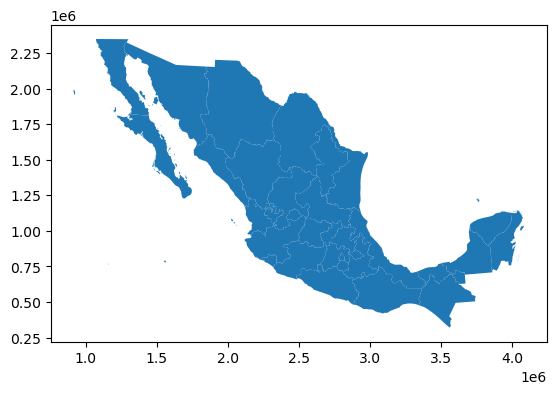

In [10]:
# read country shape
gdf_mexico = inegi_api.Entidades()

# change crs to 6372
gdf_mexico = gdf_mexico.to_crs(epsg=6372)
gdf_mexico.plot()

(114, 3)


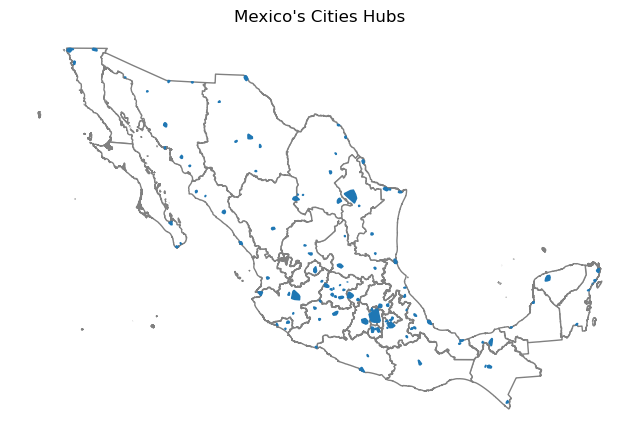

In [11]:
# read cities
gdf_cities = gpd.read_parquet("../../data/misc/cities.parquet")

# see
print(gdf_cities.shape)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
gdf_mexico.plot(ax=ax, color="white", edgecolor="gray")
gdf_cities.plot(ax=ax, color="C0", edgecolor="C0")
# title
plt.title("Mexico's Cities Hubs")
# no axis
plt.axis("off")
plt.show()

---
# General EDA

## NaNs

In [12]:
# cols in nan
gdf_properties.isna().mean()[gdf_properties.isna().mean().gt(0)].sort_values(ascending=False)

current_use      0.335894
access_routes    0.331514
constructor      0.001318
neighborhood     0.000062
dtype: float64

## Observations

In [13]:
# number of observations
print(f"Number of observations: {gdf_properties.shape[0]}")

Number of observations: 1908483


In [14]:
# read txt files
def read_and_convert_to_dataframe(file_path):
    """
    Reads a text file and converts it into a pandas DataFrame with 'category' and 'description' columns.

    Parameters:
        file_path (str): The path to the text file.

    Returns:
        pd.DataFrame: A DataFrame with the formatted content.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        data = []
        for line in lines:
            line = line.strip()  # Remove leading/trailing whitespace
            if line and not line.startswith('#'):  # Skip empty lines and comments
                parts = line.split(' ', 1)  # Split on the first space
                if len(parts) == 2:
                    category, description = parts
                    if category.isdigit():  # Ensure category is a number
                        data.append((int(category), description.strip()))

        # Create DataFrame
        df = pd.DataFrame(data, columns=['category', 'description'])

        return df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error


In [15]:
# number of observations by property_type_id
# read txt files
table_property_type = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CAT_TIPO_INMUEBLE.txt")

# count
(
    gdf_properties['property_type_id']
    .value_counts()
    .reset_index()
    .merge(
        table_property_type,
        left_on='property_type_id',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
)

description   count  percentage
0             CASA HABITACIÓN  958391    0.502174
1          CASA EN CONDOMINIO  529873    0.277641
2  DEPARTAMENTO EN CONDOMINIO  420219    0.220185

In [16]:
# number of observatios by property_class_id
# read txt files
table_property_class = read_and_convert_to_dataframe("../../data/catalogues/avaluos_catalogue/CVE_CLASE_INMUEBLE, CVE_CLASE_GENERAL_INMUEBLES_ZONA Cat.ClasesConstruccion.txt")

# count
(
    gdf_properties['property_class_id']
    .value_counts()
    .reset_index()
    .sort_values('property_class_id', ignore_index=True)
    .merge(
        table_property_class,
        left_on='property_class_id',
        right_on='category',
        how='left'
    )
    .loc[:, ['description', 'category', 'count']]
    .assign(
        percentage=lambda x: x['count'] / x['count'].sum()
    )
    .sort_values('percentage', ascending=False, ignore_index=True)
)

description  category    count  percentage
0    Interés Social         3  1025148    0.537153
1             Media         4   726538    0.380689
2          Semilujo         5   101512    0.053190
3         Económica         2    32786    0.017179
4       Residencial         6    19695    0.010320
5  Residencial Plus         7     2804    0.001469

## Time Range

In [17]:
# range of valuation_date
gdf_properties['valuation_date'].describe()

count                          1908483
mean     2021-06-26 07:39:58.221204736
min                2019-01-01 00:00:00
25%                2020-03-17 00:00:00
50%                2021-05-27 00:00:00
75%                2022-10-24 00:00:00
max                2023-12-31 00:00:00
Name: valuation_date, dtype: object

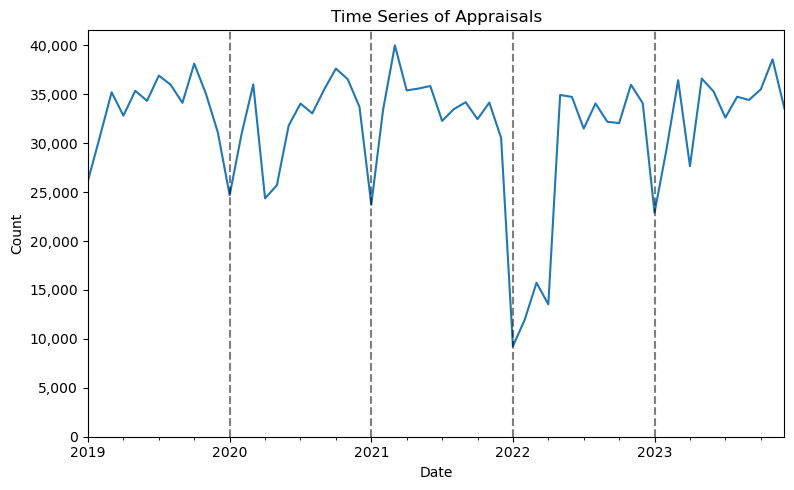

In [18]:
# time series of counts by each month and year
ts_counts = (
    gdf_properties
    ['valuation_date'].dt.to_period('M')
    .value_counts()
    .sort_index()
    .to_frame()
    # add missing months
    .reindex(pd.period_range(
        start=gdf_properties['valuation_date'].min().to_period('M'),
        end=gdf_properties['valuation_date'].max().to_period('M'),
        freq='M'
        ))
    .fillna(0)
    )

# plot time series
ts_counts.plot(figsize=(8, 5))

# add line each beginning of year
for year in range(gdf_properties['valuation_date'].dt.year.min(), gdf_properties['valuation_date'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Appraisals")
# labels
plt.xlabel("Date")
plt.ylabel("Count")

# don't show legend
plt.legend().remove()

# tight
plt.tight_layout()

# y limits
plt.ylim(0, None)

# Count in thousands
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

# show
plt.show()

## Geospatial

In [19]:
# cout by ID_ENTIDAD_F
table_properties_by_state = (
    gdf_properties['state_id']
    .value_counts(normalize=True)
    .sort_index()
    )


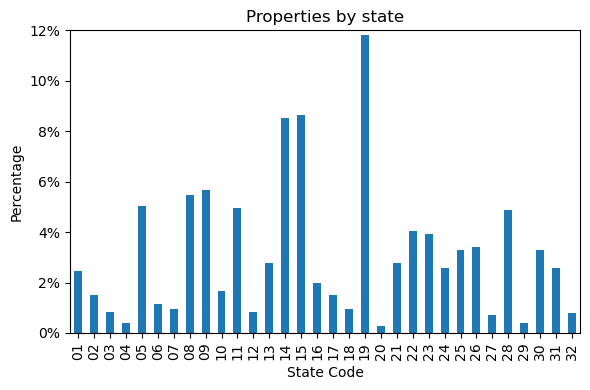

In [20]:
# plot
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
table_properties_by_state.plot(kind='bar')

# title
plt.title("Properties by state")

# percentage
plt.xlabel("State Code")
plt.ylabel("Percentage")
plt.gca().yaxis.set_major_formatter(lambda x, _: f'{x:.0%}')
plt.ylim(0, 0.12)

# tight layout
plt.tight_layout()

# show
plt.show()

Text(0.5, 1.0, 'Proportion of Observations')

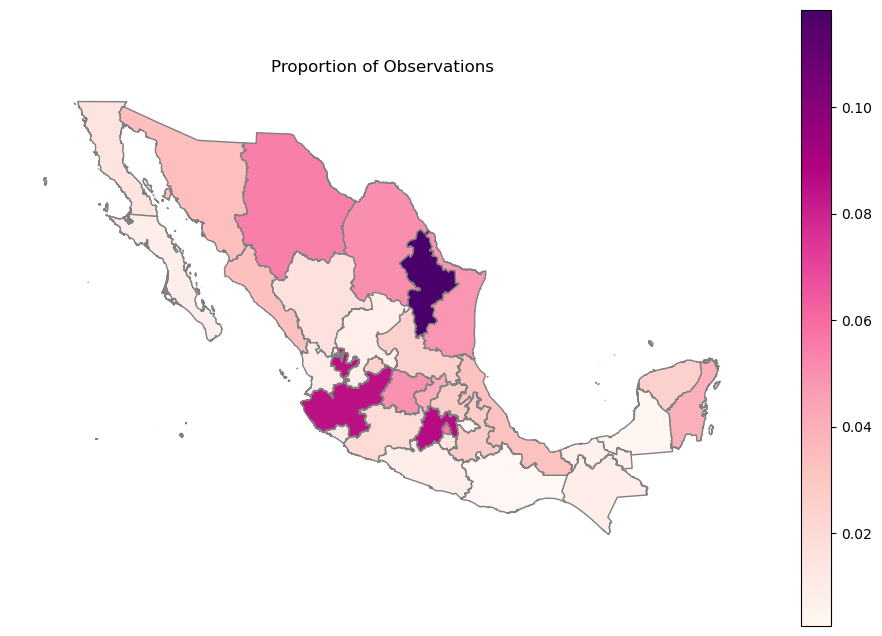

In [21]:
# plot map 
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    gdf_mexico
    .merge(
        table_properties_by_state.reset_index(),
        left_on='cvegeo',
        right_on='state_id',
        how='left'
    )
    .plot('proportion', legend=True, ax=ax, cmap='RdPu', edgecolor='gray')
)

# dont show axis
plt.axis('off')

# title
plt.title('Proportion of Observations')

---
# Analysis $Y$

In [22]:
# describe
gdf_properties['ppsm'].describe()

count    1.908483e+06
mean     1.479020e+04
std      9.322498e+03
min      4.000000e+03
25%      9.883721e+03
50%      1.214286e+04
75%      1.592593e+04
max      2.705970e+05
Name: ppsm, dtype: float64

In [23]:
# 3 types of mean: arithmetic, harmonic, geometric
# arithmetic
print(f"arithmetic: {gdf_properties['ppsm'].mean()}")
# geometric
print(f"geometric: {np.exp(gdf_properties['ppsm'].apply(np.log).mean())}")
# harmonic
print(f"harmonic: {gdf_properties.shape[0] / gdf_properties['ppsm'].apply(lambda x: 1/x).sum()}")

arithmetic: 14790.199893667861
geometric: 13145.677322015275
harmonic: 12084.415737463689


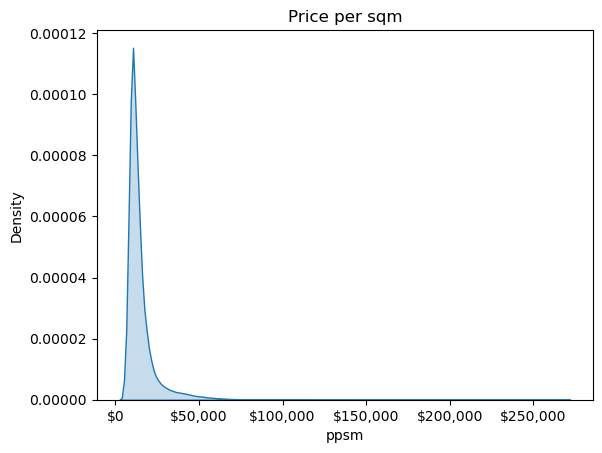

In [24]:
# distribution
sns.kdeplot(gdf_properties, x='ppsm', fill=True)

# title
plt.title("Price per sqm")

# x ticks in thousands and money
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

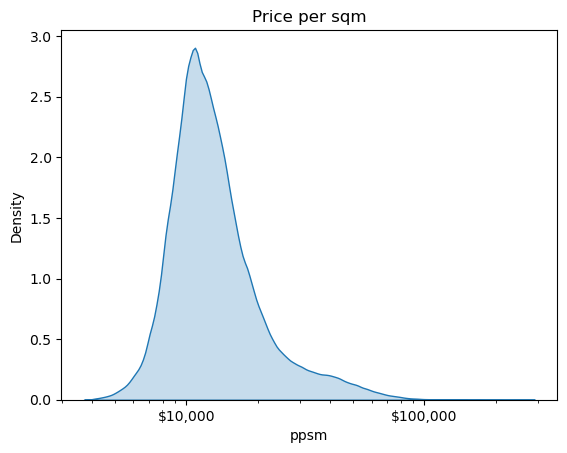

In [25]:
# distribution
sns.kdeplot(gdf_properties, x='ppsm', fill=True, log_scale=True)

# title
plt.title("Price per sqm")

# x ticks in thousands and money
plt.gca().xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_53037/1540771900.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))


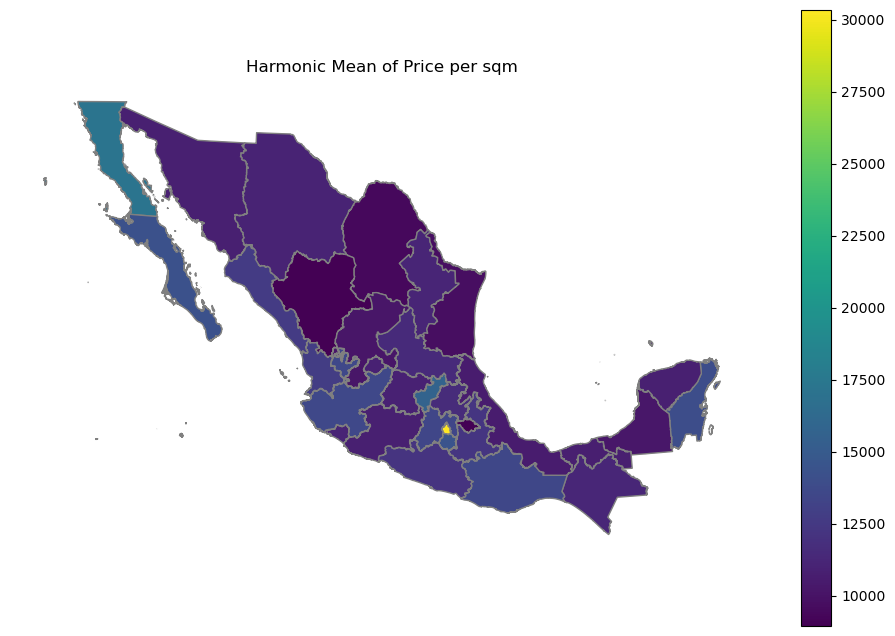

In [26]:
# get harmonic mean for each state_id and plot the map
table_harmonic_mean = (
    gdf_properties
    .groupby('state_id')
    # harmonic mean
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))
    .to_frame('harmonic_mean')
    .reset_index()
    .merge(
        gdf_mexico,
        left_on='state_id',
        right_on='cvegeo',
        how='right'
    )
    .pipe(gpd.GeoDataFrame, crs=gdf_mexico.crs, geometry='geometry')
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    table_harmonic_mean
    .plot('harmonic_mean', legend=True, ax=ax, cmap='viridis', edgecolor='gray')
)

# title
plt.title('Harmonic Mean of Price per sqm')

# dont show axis
plt.axis('off')

# show
plt.show()

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_53037/3963879911.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.mean(np.log(x['ppsm'])))


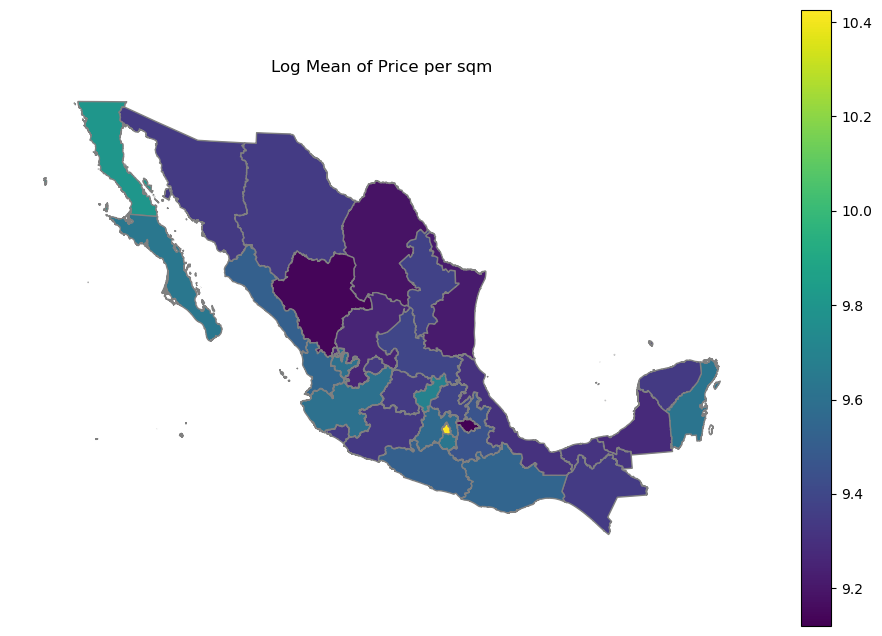

In [27]:
# get log mean for each state_id and plot the map
table_log_mean = (
    gdf_properties
    .groupby('state_id')
    # harmonic mean
    .apply(lambda x: np.mean(np.log(x['ppsm'])))
    .to_frame('log_mean')
    .reset_index()
    .merge(
        gdf_mexico,
        left_on='state_id',
        right_on='cvegeo',
        how='right'
    )
    .pipe(gpd.GeoDataFrame, crs=gdf_mexico.crs, geometry='geometry')
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
(
    table_log_mean
    .plot('log_mean', legend=True, ax=ax, cmap='viridis', edgecolor='gray')
)

# title
plt.title('Log Mean of Price per sqm')

# dont show axis
plt.axis('off')

# show
plt.show()

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_53037/3182073065.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))


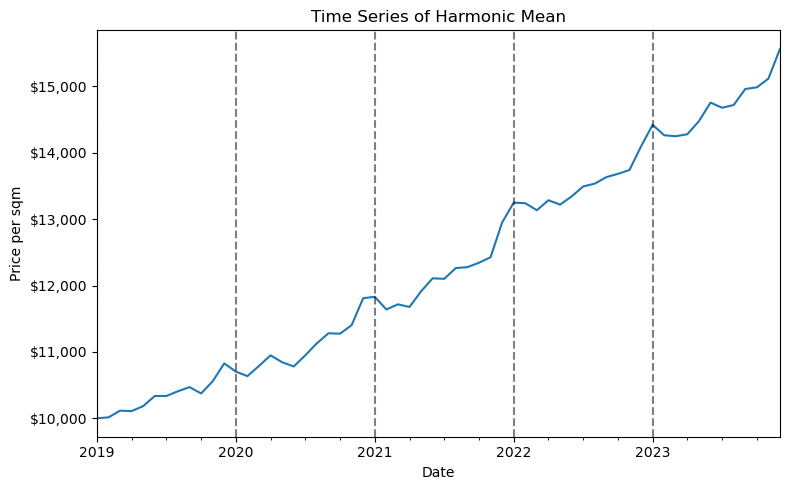

In [28]:
# hmean by month
ts_hmean = (
    gdf_properties
    .assign(
        month=lambda x: x['valuation_date'].dt.to_period('M')
    )
    .groupby('month')
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))
    .to_frame('hmean')
)

# plot
ts_hmean.plot(figsize=(8, 5))

# add line each beginning of year
for year in range(gdf_properties['valuation_date'].dt.year.min(), gdf_properties['valuation_date'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Harmonic Mean")
# labels
plt.xlabel("Date")
plt.ylabel("Price per sqm")

# don't show legend
plt.legend().remove()

# y ticks in thousands and money
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# tight
plt.tight_layout()

# show
plt.show()

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_53037/3329197603.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))


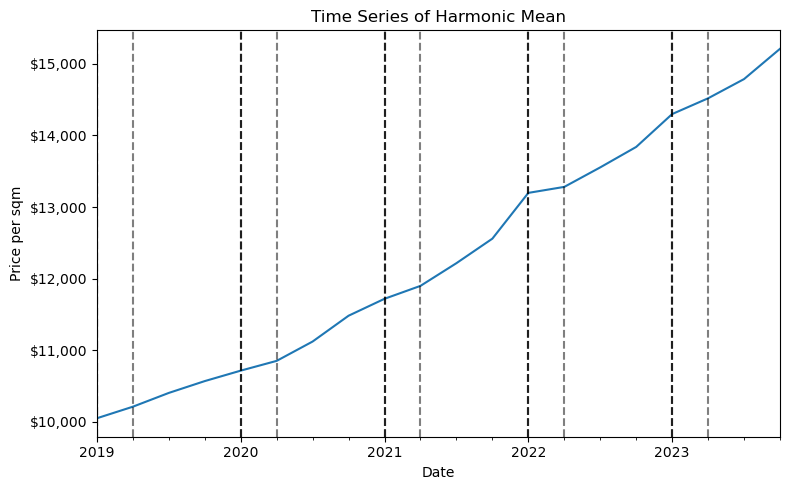

In [29]:
# hmean by quarter
ts_hmean = (
    gdf_properties
    .assign(
        quarter=lambda x: x['valuation_date'].dt.to_period('Q')
    )
    .groupby('quarter')
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))
    .to_frame('hmean')
)

# plot
ts_hmean.plot(figsize=(8, 5))

# add line each beginning of year
for year in range(gdf_properties['valuation_date'].dt.year.min(), gdf_properties['valuation_date'].dt.year.max() + 1):
    for quarter in range(1, 5):
        plt.axvline(x=f'{year}-{quarter}', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Harmonic Mean")
# labels
plt.xlabel("Date")
plt.ylabel("Price per sqm")

# don't show legend
plt.legend().remove()

# y ticks in thousands and money
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# tight
plt.tight_layout()

# show
plt.show()


---
# Univariate Analysis $X$

## Categorical

In [37]:
# for each categorical column, describe
cols_categorical = list(set(
    gdf_properties.select_dtypes(include='string').columns.tolist()
    + gdf_properties.select_dtypes(include='category').columns.tolist() 
    + gdf_properties.select_dtypes(include='object').columns.tolist()
    + gdf_properties.filter(like='_id').columns.tolist()
    ))

# describe
(gdf_properties[cols_categorical].astype(str).describe().T.assign(perc=lambda x: x['freq'] / x['count']))

count   unique  \
grantor_id                          1908483      136   
project_quality_id                  1908483        6   
road_materials_id                   1908483        9   
telephone_service_supply_id         1908483        5   
neighborhood                        1908483   190965   
curb_id                             1908483        5   
property_type_id                    1908483        3   
current_use                         1908483   242745   
lighting_service_id                 1908483        4   
observation_id                      1908483  1908483   
potable_water_service_id            1908483        4   
municipality_id                     1908483      132   
constructor                         1908483    27605   
purpose_of_appraisal                1908483       75   
water_collection_service_id         1908483        5   
property_id                         1908483  1867756   
state_id                            1908483       32   
infrastructure_service_id           1908483        4   
urban_proximity_id                  1908483        5   
hex_id                              1908483    78810   
ocean_label                         1908483        6   
equipment_id                        1908483        4   
property_class_more_common_in_area  1908483        6   
public_transportation_service_id    1908483        3   
controller_id                       1908483     1045   
sidewalk_id                         1908483        6   
valuation_unit_id                   1908483      107   
property_class_id                   1908483        6   
access_routes                       1908483   571883   
conservation_status_id              1908483        5   
electrical_supply_service_id        1908483        4   
valuation_professional_id           1908483     2470   
elevator_service_id                 1908483        3   

                                                                     top  \
grantor_id                          98013144-6a9f-4e08-9255-cb54568d2f5a   
project_quality_id                                                     1   
road_materials_id                                                      2   
telephone_service_supply_id                                            2   
neighborhood                                                      CENTRO   
curb_id                                                                1   
property_type_id                                                       2   
current_use                                                         <NA>   
lighting_service_id                                                    3   
observation_id                      43c375b2-75fd-4fcc-b311-55b396e7cbbf   
potable_water_service_id                                               1   
municipality_id                                                      006   
constructor                                                    NO APLICA   
purpose_of_appraisal                                                 S/D   
water_collection_service_id                                            1   
property_id                         18e27699-a0d1-5ecb-88ca-35b4d6bae7d8   
state_id                                                              19   
infrastructure_service_id                                              3   
urban_proximity_id                                                     2   
hex_id                                                   89499535d63ffff   
ocean_label                                                     no_ocean   
equipment_id                                                           4   
property_class_more_common_in_area                                     3   
public_transportation_service_id                                       1   
controller_id                       34e46c5f-11c3-4c22-afc4-ead80d8e108b   
sidewalk_id                                                            1   
valuation_unit_id                   3f6bbfd4-2126-435b-9c6b-8efe0fd50e8f   
prope

In [38]:
# count of unique values 
def count_unique_values(df, col, max_values=10):
    """
    Count the number of unique values in a column and return the result as a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to analyze.
        max_values (int): The maximum number of unique values to display. If there are more unique values, they will be grouped in an 'Others' category.
    
    Returns:
        pd.DataFrame: A DataFrame with the count of unique values.
    """
    # counts
    table_counts = (
        df[col]
        .value_counts(dropna=False)
        .reset_index()
        .assign(
            perc=lambda x: x['count'] / x['count'].sum()
        )
        .sort_values(by='count', ascending=False)
        .head(max_values)
    )
    
    num_others = df.shape[0] - table_counts['count'].sum()

    # append others if necessary
    if num_others > 0:
        table_counts = pd.concat([
            table_counts,
            pd.DataFrame({
                col: 'others',
                'count': [num_others],
                'perc': [num_others / df.shape[0]]
            })
        ],
        axis=0,
        ignore_index=True
    )

    return table_counts

# count of unique values
for col in cols_categorical:
    print(f"\n{col} {'=' * 50}")
    print(count_unique_values(gdf_properties, col, max_values=10))


grantor_id ==================================================
                              grantor_id    count      perc
0   98013144-6a9f-4e08-9255-cb54568d2f5a  1133417  0.593884
1   01c8bed5-4e5c-44b6-8346-5081a32429d5   157790  0.082678
2   7bc546d9-fc16-4791-b0e0-e378fc472b6d   149244    0.0782
3   6f8c15c7-2914-40bb-87ff-59076af288c9    91556  0.047973
4   671b3e31-6e21-4149-ae76-b0a4e7eb3a62    90223  0.047275
5   9a2781c9-b312-453c-86d1-a6e90584a083    73929  0.038737
6   b6ec5872-8e1c-4a3e-908f-5dc1ab822e5b    73880  0.038711
7   2c2cf133-a887-495e-b0b1-c48c0d83173f    61916  0.032443
8   cc205b62-3269-474a-ae20-3a170c376c5b    26915  0.014103
9   225da728-3a1b-4fe1-a5d2-0212922b90d1     9231  0.004837
10                                others    40382  0.021159

project_quality_id ==================================================
   project_quality_id    count          perc
0                   1  1249325  6.546168e-01
1                   0   647060  3.390442e-01
2          

In [39]:
# get entropy of each column
def entropy(series):
    """
    Calculate the entropy of a pandas Series.

    Parameters:
        series (pd.Series): The input Series.

    Returns:
        float: The entropy of the Series.
    """
    # counts
    counts = series.value_counts(normalize=True)
    return -np.sum(counts * np.log2(counts + 1e-6))

# entropy of each column
(
    gdf_properties
    .loc[:, cols_categorical]
    .astype(str)
    .apply(entropy)
    .sort_values(ascending=False)
)

observation_id                        19.323728
property_id                           19.301776
hex_id                                14.744092
neighborhood                          14.261273
access_routes                         11.905299
valuation_professional_id              9.811752
controller_id                          8.392373
current_use                            7.215175
municipality_id                        5.881175
valuation_unit_id                      5.715111
state_id                               4.531366
constructor                            4.224333
grantor_id                             2.299101
telephone_service_supply_id            1.705509
electrical_supply_service_id           1.670486
road_materials_id                      1.635338
urban_proximity_id                     1.600111
lighting_service_id                    1.576518
property_type_id                       1.493014
equipment_id                           1.471566
property_class_more_common_in_area     1

## Continuous Variables

In [ ]:
# describe of numerical columns
cont_cols = gdf_properties.select_dtypes(include='number').columns.tolist()

# describe
gdf_properties[cont_cols].describe()

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/pandas/core/nanops.py:1487: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
/Users/ravj/opt/anaconda3/envs/mds-research-

half_bathrooms  full_bathrooms      zip_code  age_in_months  \
count    1.908483e+06    1.908483e+06  1.908483e+06   1.908483e+06   
mean     3.491700e-01    1.488231e+00  5.584433e+04   5.291538e+01   
std      5.124819e-01    8.050008e-01  2.480529e+04   7.346578e+01   
min      0.000000e+00    1.000000e+00  0.000000e+00   0.000000e+00   
25%      0.000000e+00    1.000000e+00  3.515900e+04   0.000000e+00   
50%      0.000000e+00    1.000000e+00  5.653600e+04   8.000000e+00   
75%      1.000000e+00    2.000000e+00  7.751900e+04   9.600000e+01   
max      6.000000e+00    8.000000e+00  9.999900e+04   2.550000e+02   

       parking_lots  potable_water_service_id  lighting_service_id  \
count  1.908483e+06              1.908483e+06         1.908483e+06   
mean   1.135525e+00              6.700033e-01         1.734876e+00   
std    6.593062e-01              4.734211e-01         1.286769e+00   
min    0.000000e+00              0.000000e+00         0.000000e+00   
25%    1.000000e+00              0.000000e+00         0.000000e+00   
50%    1.000000e+00              1.000000e+00         2.000000e+00   
75%    1.000000e+00              1.000000e+00         3.000000e+00   
max    8.000000e+00              3.000000e+00         3.000000e+00   

        sidewalk_id  project_quality_id  property_class_id  \
count  1.908483e+06        1.908483e+06       1.908483e+06   
mean   7.465600e-01        6.717063e-01       3.506725e+00   
std    7.399575e-01        5.008441e-01       6.857419e-01   
min    0.000000e+00        0.000000e+00       2.000000e+00   
25%    0.000000e+00        0.000000e+00       3.000000e+00   
50%    1.000000e+00        1.000000e+00       3.000000e+00   
75%    1.000000e+00        1.000000e+00       4.000000e+00   
max    5.000000e+00        5.000000e+00       7.000000e+00   

       conservation_status_id  elevator_service_id  equipment_id  \
count            1.908483e+06         1.908483e+06  1.908483e+06   
mean             5.053789e+00         1.495945e+00  3.358837e+00   
std              1.006553e+00         8.561169e-01  8.425261e-01   
min              3.000000e+00         0.000000e+00  1.000000e+00   
25%              4.000000e+00         1.000000e+00  3.000000e+00   
50%              5.000000e+00         2.000000e+00  4.000000e+00   
75%              6.000000e+00         2.000000e+00  4.000000e+00   
max              7.000000e+00         2.000000e+00  4.000000e+00   

            curb_id  infrastructure_service_id  road_materials_id  \
count  1.908483e+06               1.908483e+06       1.908483e+06   
mean   6.947696e-01               3.058459e+00       2.748957e+00   
std    5.369244e-01               3.497220e-01       1.264871e+00   
min    0.000000e+00               1.000000e+00       0.000000e+00   
25%    0.000000e+00               3.000000e+00       2.000000e+00   
50%    1.000000e+00               3.000000e+00       2.000000e+00   
75%    1.000000e+00               3.000000e+00       3.000000e+00   
max    4.000000e+00               4.000000e+00       8.000000e+00   

       urban_proximity_id  water_collection_service_id  \
count        1.908483e+06                 1.908483e+06   
mean         2.541987e+00                 7.063369e-01   
std          7.400367e-01                 5.490405e-01   
min          1.000000e+00                 0.000000e+00   
25%          2.000000e+00                 0.000000e+00   
50%          3.000000e+00                 1.000000e+00   
75%          3.000000e+00                 1.000000e+00   
max          5.000000e+00                 4.000000e+00   

       electrical_supply_service_id  telephone_service_supply_id  \
count                  1.908483e+06                 1.908483e+06   
mean                   1.110081e+00                 1.060461e+00   
std                    8.955752e-01                 8.764372e-01   
min                    0.000000e+00                 0.000000e+00   
25%                    0.000000e+00                 0.000000e+00   
50%                 

In [ ]:
# columns with 'count' in the name
gdf_properties.filter(like='count').gt(0).mean()

count_supermarkets_at_1km    0.427400
count_hospitals_at_5km       0.542091
count_metro_at_1km           0.020698
count_schools_at_1km         0.050955
count_restaurants_at_1km     0.196209
dtype: float64

In [ ]:
# count of elevador
# Cat.Suministro
# 0 NO APLICA
# 1 EXISTE
# 2 NO EXISTE
gdf_properties['elevator_service_id'].value_counts(normalize=True, dropna=False)

elevator_service_id
2    0.737421
0    0.241476
1    0.021103
Name: proportion, dtype: float64

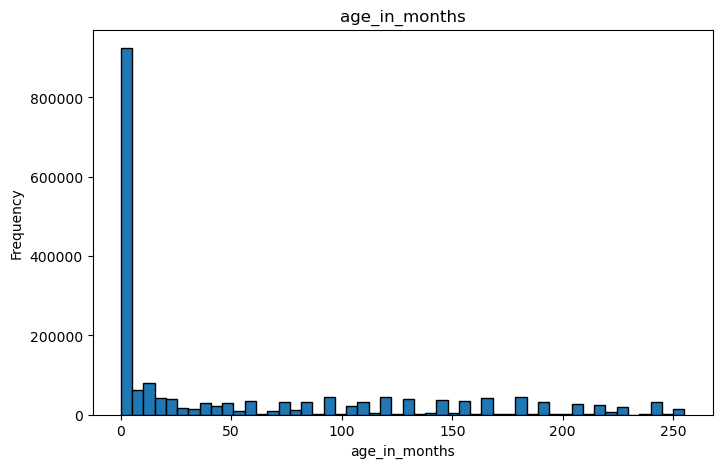

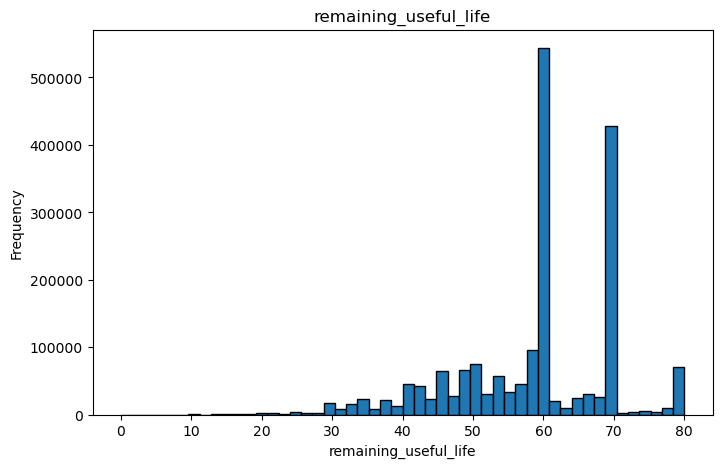

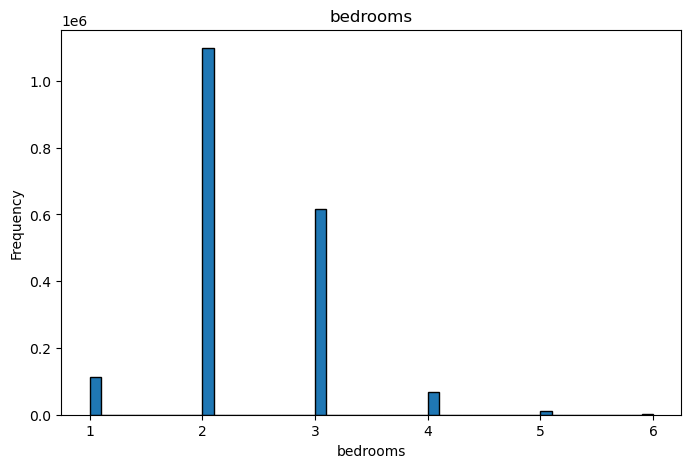

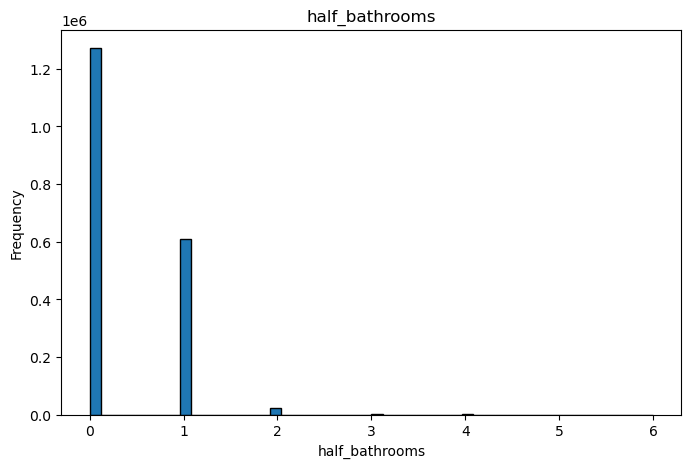

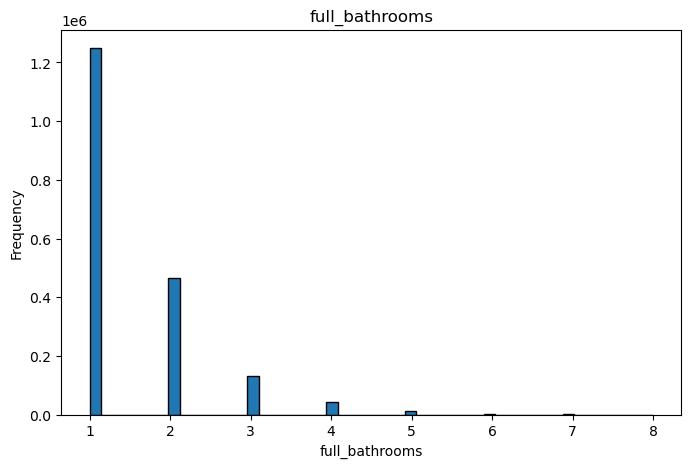

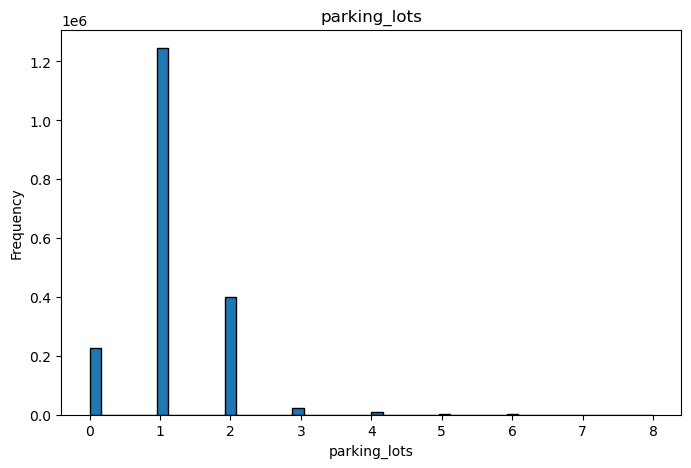

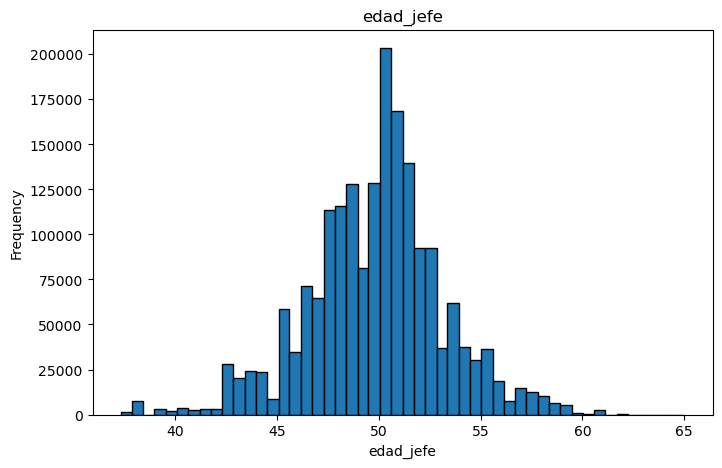

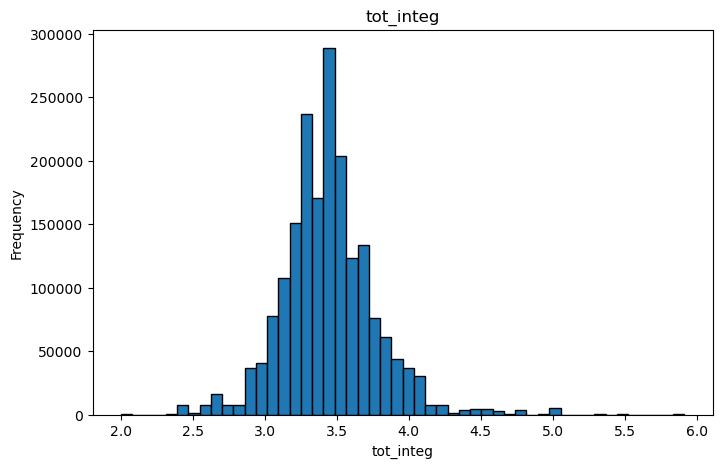

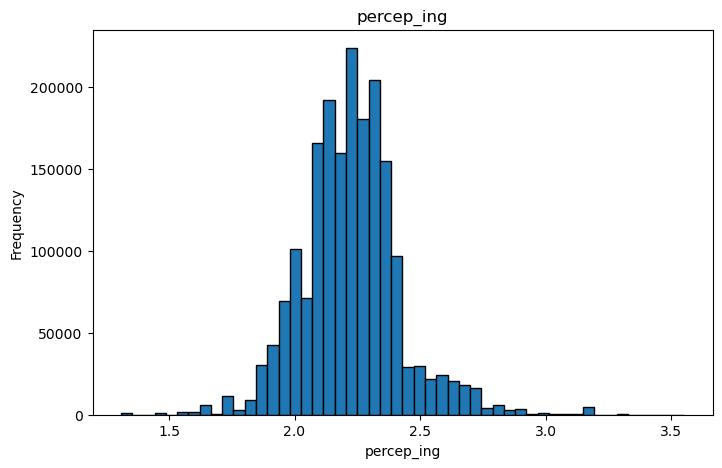

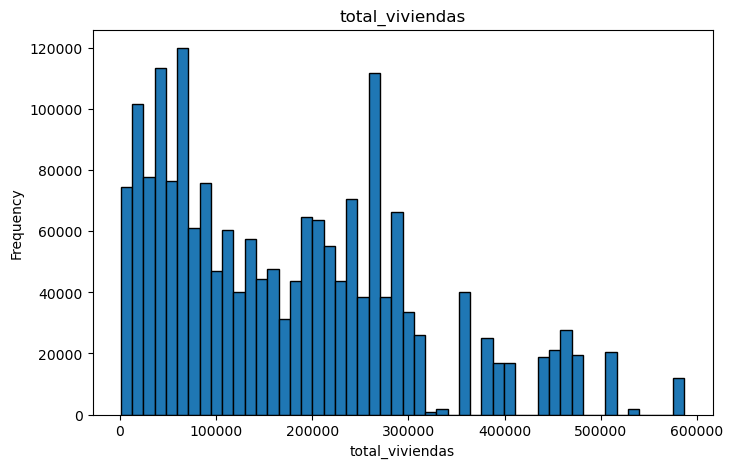

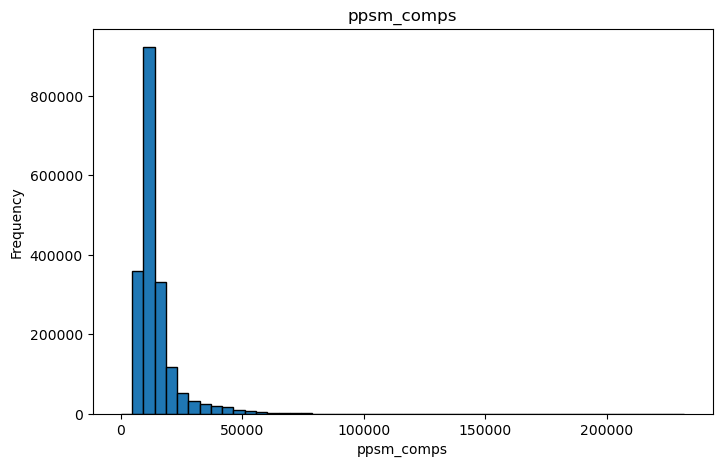

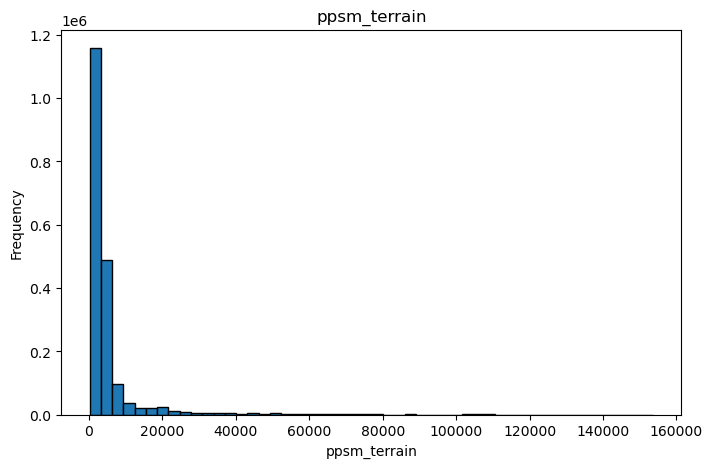

In [ ]:
# histogram
def create_histogram(df, col, bins=10, log=False):
    """
    Create a histogram of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.
        bins (int): The number of bins to use in the histogram.

    Returns:
        None: The function does not return a value. It displays the histogram.
    """
    # plot
    df[col].plot(kind='hist', bins=bins, edgecolor='black', figsize=(8, 5))

    # title
    plt.title(f'{col}')

    # labels
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # if log, then log base 10
    if log:
        plt.xscale('log')

    # show
    plt.show()

# histogram of 'edad_anios'
cols_to_plot = [
    'age_in_months',
    'remaining_useful_life',
    'bedrooms',
    'half_bathrooms',
    'full_bathrooms',
    'parking_lots',
    'edad_jefe',
    'tot_integ',
    'percep_ing',
    'total_viviendas',
    'ppsm_comps',
    'ppsm_terrain'
]

# normal
for col in cols_to_plot:
    create_histogram(gdf_properties, col, bins=50)

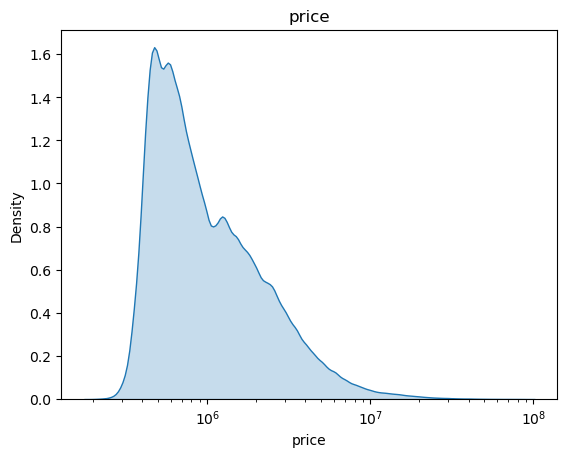

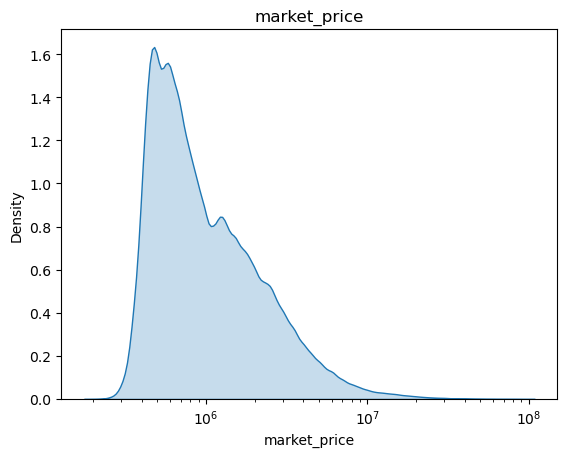

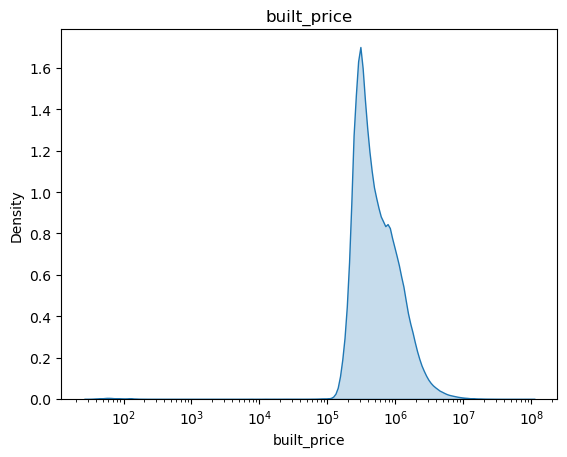

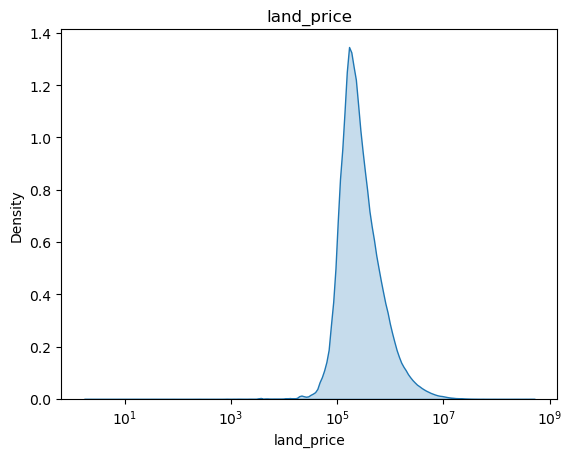

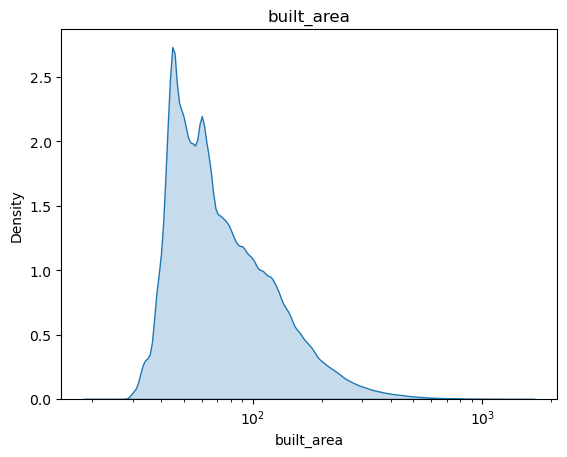

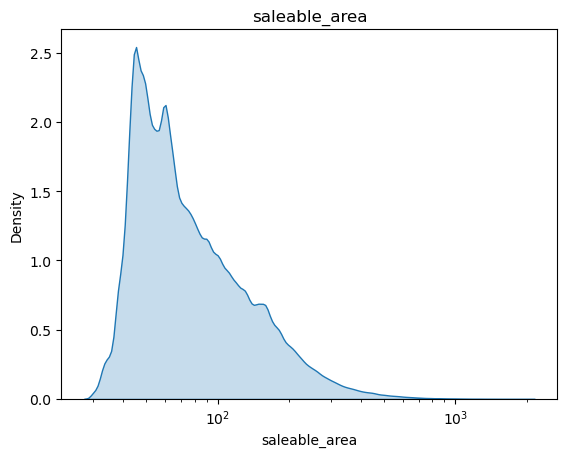

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_7424/1972764738.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


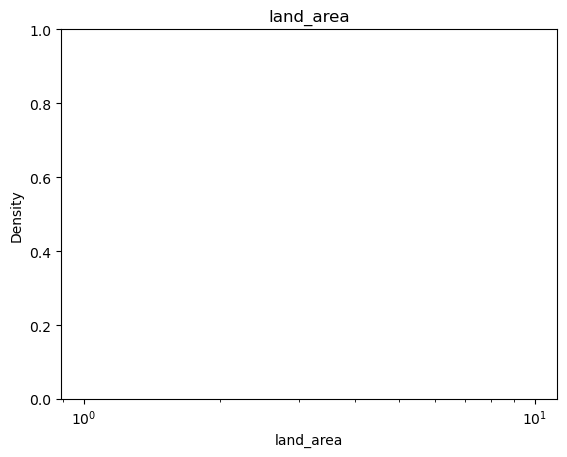

In [ ]:
# create kde
def create_kde(df, col, log=False):
    """
    Create a kernel density estimate plot of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.

    Returns:
        None: The function does not return a value. It displays the KDE plot.
    """
    # plot
    sns.kdeplot(
        df,
        x=col,
        color='C0',
        legend=False,
        fill=True,
        log_scale=True
    )

    # title
    plt.title(f'{col}')

    # labels
    plt.xlabel(col)
    plt.ylabel('Density')

    # show
    plt.show()

# log
cols_to_plot_log = [
    'price',
    'market_price',
    'built_price',
    'land_price',
    'built_area',
    'saleable_area',
    'land_area'
]

# plt
for col in cols_to_plot_log:
    create_kde(gdf_properties, col, log=True)

---
# Colinearity $X^TX$

In [ ]:
def plt_clustermap(df, cols, method_corr, cmap='coolwarm_r', fmat='.4f'):
    """
    Create a clustermap of the correlation matrix of a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        cols (list): The columns to include in the correlation matrix.
        method (str): The method to use for clustering.
        cmap (str): The colormap to use in the clustermap.

    Returns:
        None: The function does not return a value. It displays the clustermap.
    """
    # corr
    corr_matrix = df[cols].corr(method=method_corr)

    # cluster map
    plt.figure(figsize=(8, 8))
    sns.clustermap(corr_matrix, cmap=cmap, annot=True, center=0, fmt=fmat)
    plt.show()


<Figure size 800x800 with 0 Axes>

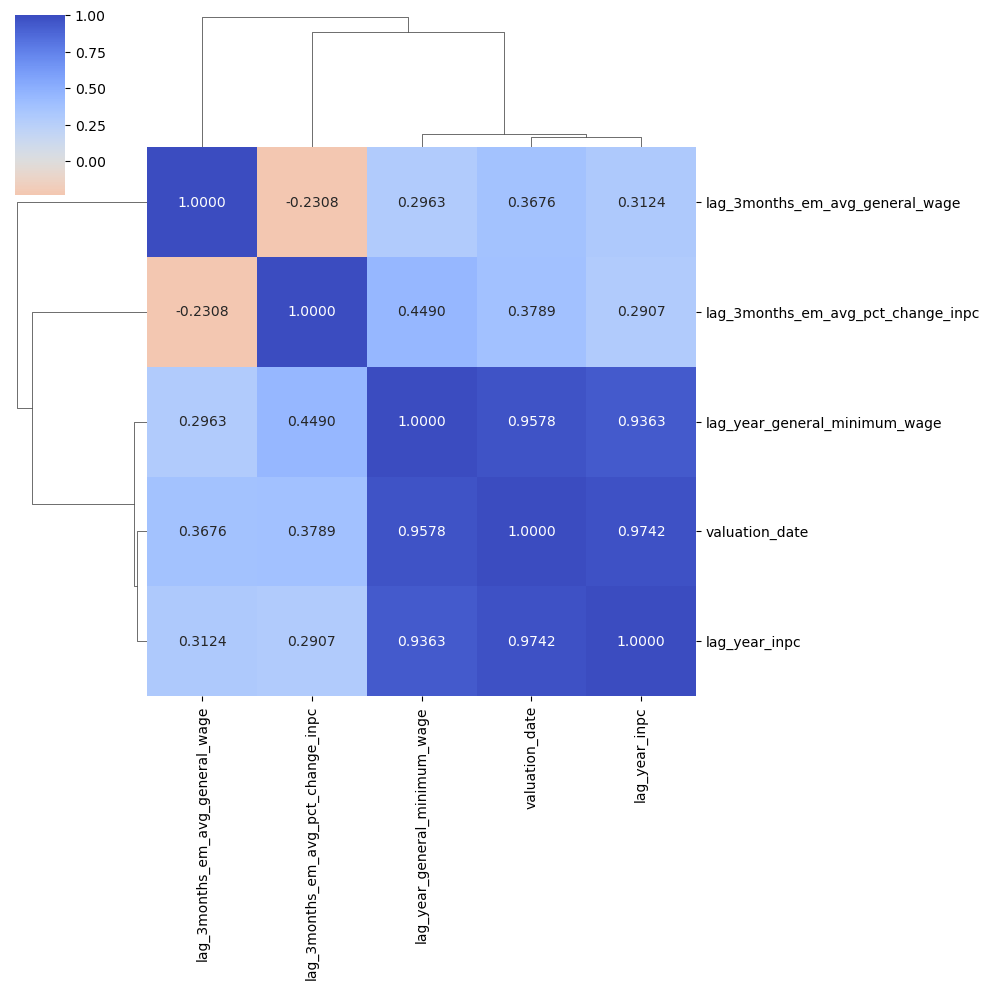

In [ ]:
# time variables
cols_to_get_corr = [
    'valuation_date', 'lag_year_inpc', 'lag_3months_em_avg_pct_change_inpc', 'lag_year_general_minimum_wage', 'lag_3months_em_avg_general_wage'
]

# corr
plt_clustermap(gdf_properties, cols_to_get_corr, 'pearson')

<Figure size 800x800 with 0 Axes>

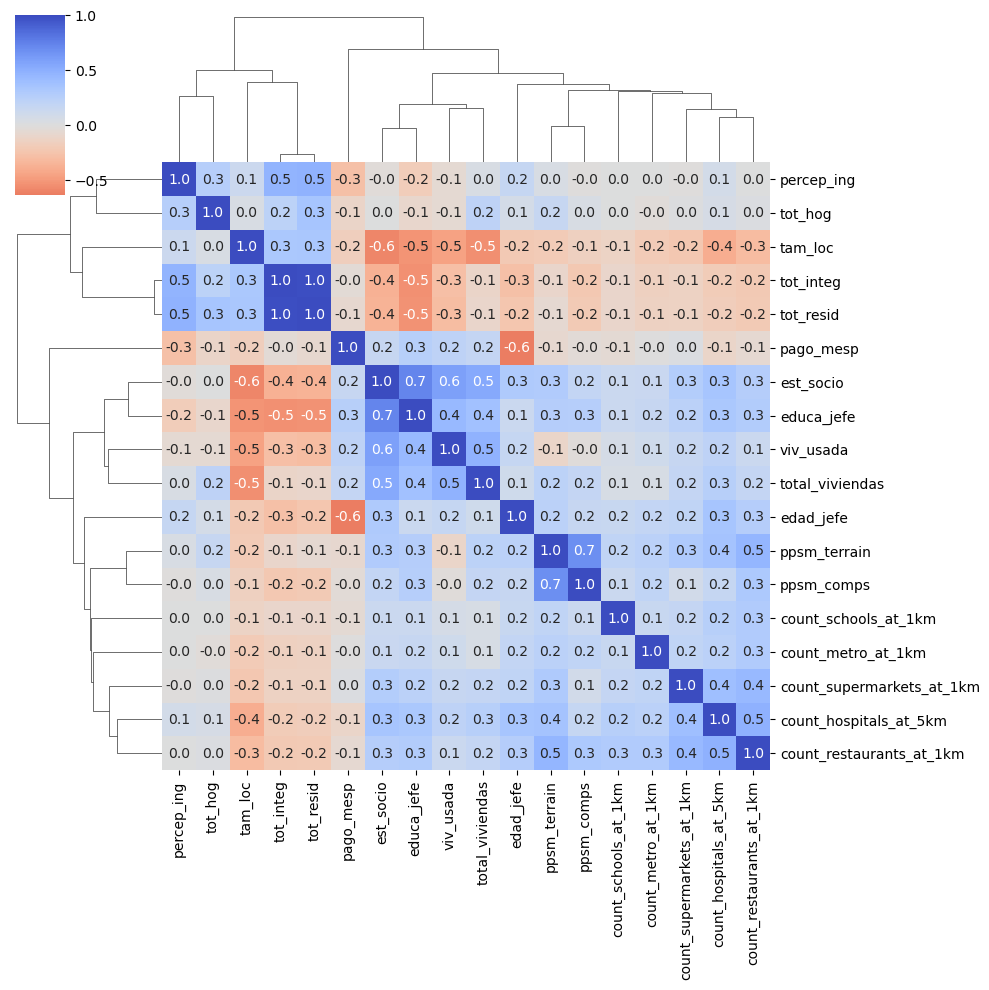

In [ ]:
# zone variables
cols_to_get_corr = [
    'tam_loc', 'est_socio', 'edad_jefe', 'educa_jefe', 'tot_integ',
    'percep_ing', 'pago_mesp', 'viv_usada', 'tot_resid', 'tot_hog', 
    'total_viviendas',
    'count_supermarkets_at_1km',
    'count_hospitals_at_5km',
    'count_metro_at_1km',
    'count_schools_at_1km',
    'count_restaurants_at_1km',
    'ppsm_terrain',
    'ppsm_comps'
]

# corr
plt_clustermap(gdf_properties, cols_to_get_corr, 'spearman', fmat='.1f')

In [ ]:
# cretae has_elevator
gdf_properties['has_elevator'] = gdf_properties['elevator_service_id'].eq(1).astype(int)

<Figure size 800x800 with 0 Axes>

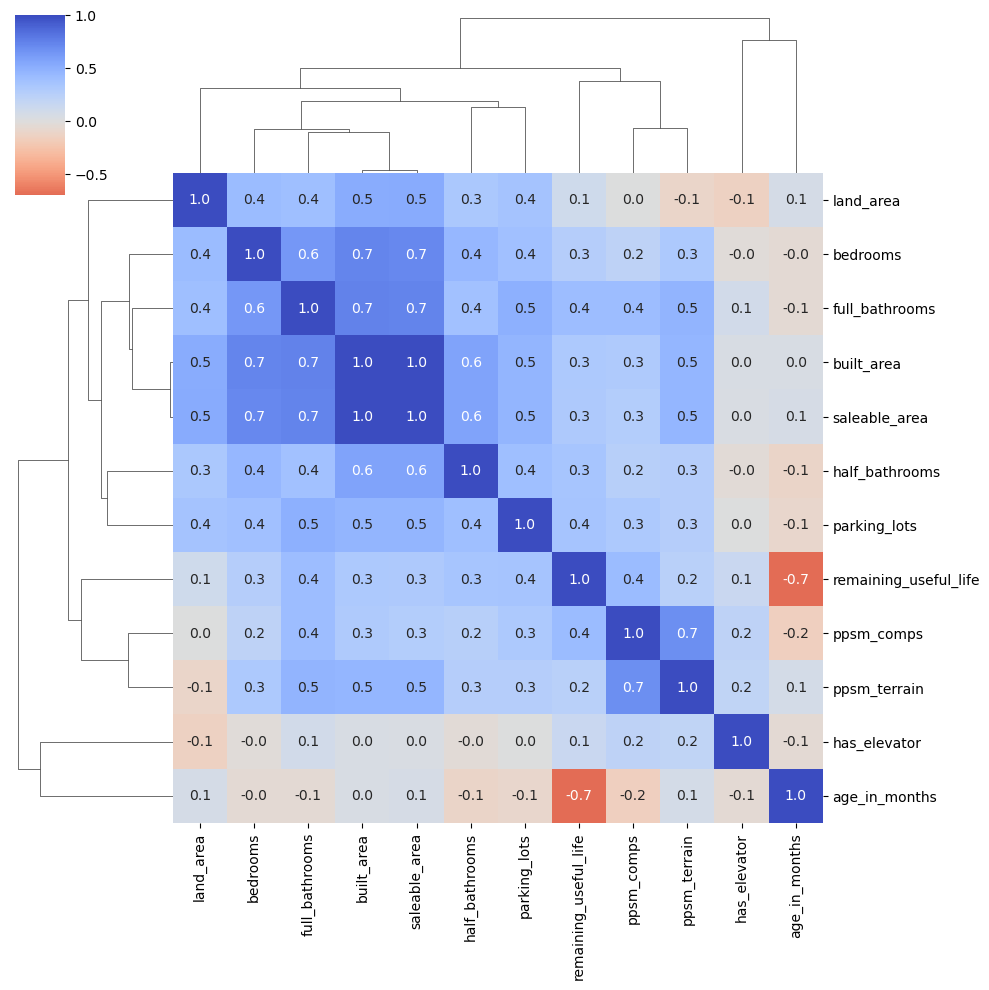

In [ ]:
# controlled variables
cols_to_get_corr = [
    'has_elevator', 'age_in_months', 'remaining_useful_life', 'bedrooms',
    'full_bathrooms', 'half_bathrooms', 'parking_lots',
    'built_area', 'land_area', 'saleable_area',
    'ppsm_comps', 'ppsm_terrain'
]

# corr
plt_clustermap(gdf_properties, cols_to_get_corr, 'spearman', fmat='.1f')

---
# Relationship between $X$ and $Y$

## Subset

In [ ]:
# count of year
table_spatiotemporal_counts = (
    gdf_properties
    .assign(year_appraisal=gdf_properties['valuation_date'].dt.year)
    .groupby(['year_appraisal'], as_index=False)
    .size()
    .sort_values('size', ascending=False)
    .head()
)
table_spatiotemporal_counts

year_appraisal    size
0            2019  405839
2            2021  401086
4            2023  397614
1            2020  383919
3            2022  320025

In [ ]:
# count of city cluster and year of fecha avaluo
table_spatiotemporal_counts = (
    gdf_properties
    .assign(year_appraisal=gdf_properties['valuation_date'].dt.year)
    .query("state_id.eq('09')")
    .groupby(['state_id', 'municipality_id', 'year_appraisal'], as_index=False)
    .size()
    .sort_values('size', ascending=False)
    .head()
)
table_spatiotemporal_counts

state_id municipality_id  year_appraisal  size
57       09             014            2021  4667
55       09             014            2019  3945
59       09             014            2023  3913
56       09             014            2020  3660
58       09             014            2022  3660

In [ ]:
# count of city cluster
table_spatiotemporal_counts = (
    gdf_properties
    .query("state_id.eq('09')")
    .groupby(['state_id', 'municipality_id'])
    .size()
    .sort_values(ascending=False)
    .to_frame('count')
    .reset_index()
)
table_spatiotemporal_counts

state_id municipality_id  count
0        09             014  19845
1        09             015  12837
2        09             016   9251
3        09             007   8962
4        09             010   8803
5        09             003   8075
6        09             005   7799
7        09             002   7529
8        09             012   5967
9        09             006   5898
10       09             017   5041
11       09             004   3775
12       09             011   1933
13       09             013   1310
14       09             008   1217

In [ ]:
# subsets
gdf_properties_time_control = gdf_properties.query("valuation_date.dt.year.eq(2021)")
gdf_properties_spatial_control = gdf_properties.query("state_id.eq('09') & municipality_id.eq('014')")
gdf_properties_spatiotemporal_control = gdf_properties.query("state_id.eq('09') & municipality_id.eq('014') & valuation_date.dt.year.eq(2021)")

# see shapes
print(f"Original shape: {gdf_properties.shape}")
print(f"Subset shape time: {gdf_properties_time_control.shape}")
print(f"Subset shape space: {gdf_properties_spatial_control.shape}")
print(f"Subset shape space-time: {gdf_properties_spatiotemporal_control.shape}")

Original shape: (1908483, 111)
Subset shape time: (401086, 111)
Subset shape space: (19845, 111)
Subset shape space-time: (4667, 111)


## Categorical

In [ ]:
# box plot of categorical
def plot_box_plot(df, col, max_values=10):
    """
    Create a box plot of a column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        col (str): The column to plot.
        max_values (int): The maximum number of unique values to display. If there are more unique values, they will be grouped in an 'Others' category.

    Returns:
        None: The function does not return a value. It displays the box plot.
    """
    # generate aux col value
    df = (
        df.copy()
        .assign(
            col_count=lambda x: x.groupby(col)[col].transform('count'),
            rank_col=lambda x: x['col_count'].rank(ascending=False, method='dense'),
            col_category=lambda x: np.where(x['rank_col'] < max_values, x[col], 'others')
        )
        .assign(
            col_category=lambda x: pd.Categorical(x['col_category'], ordered=True)
        )
    )

    # box plot
    sns.boxplot(
        x='col_category',
        y='ppsm',
        data=df,
        showfliers=False
    )

    # x label
    plt.xlabel(col)
    plt.xticks(rotation=90)

    # y label
    plt.ylabel('Price per sqm')

    # y log scale
    plt.yscale('log')

    # title
    plt.title(f'Price per sqm by {col}')

    # show
    plt.show()


/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


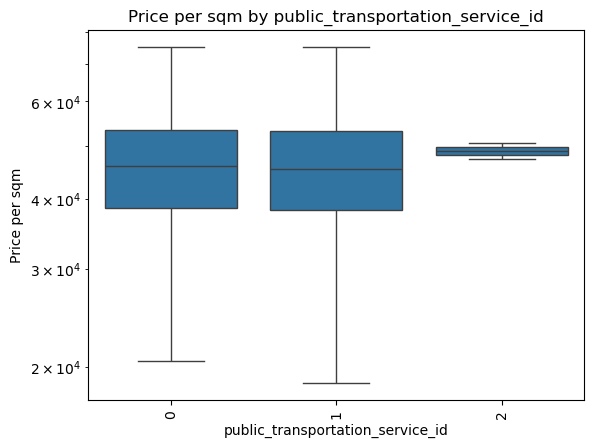

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


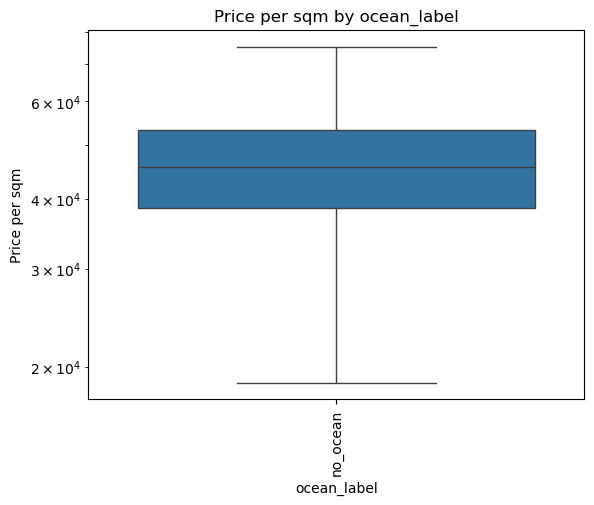

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


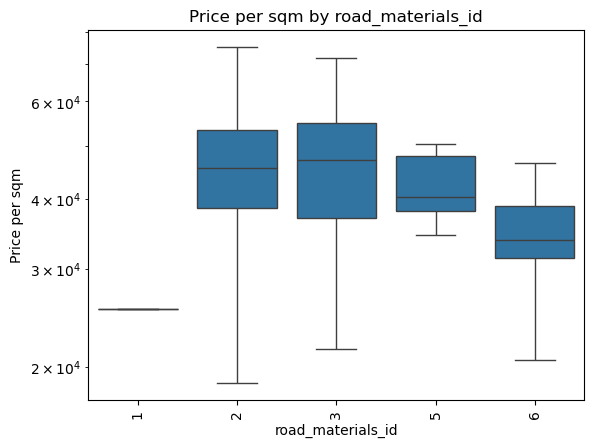

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


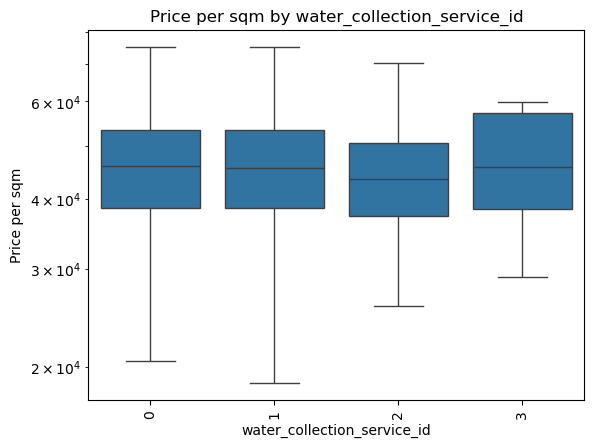

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


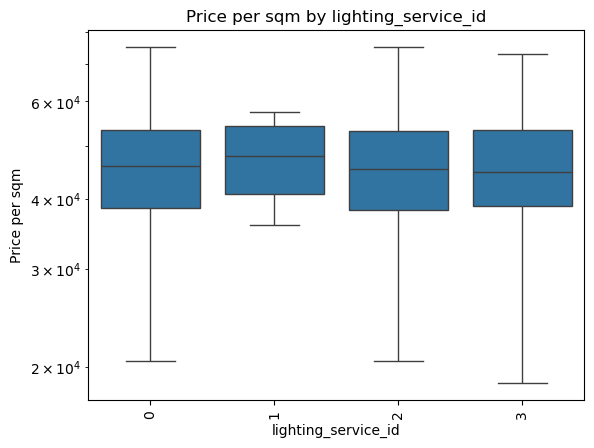

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


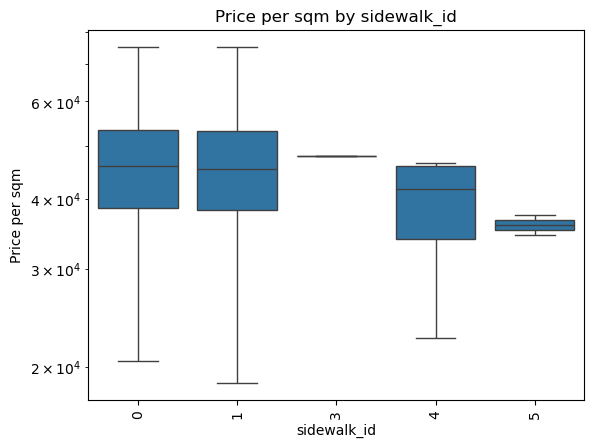

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


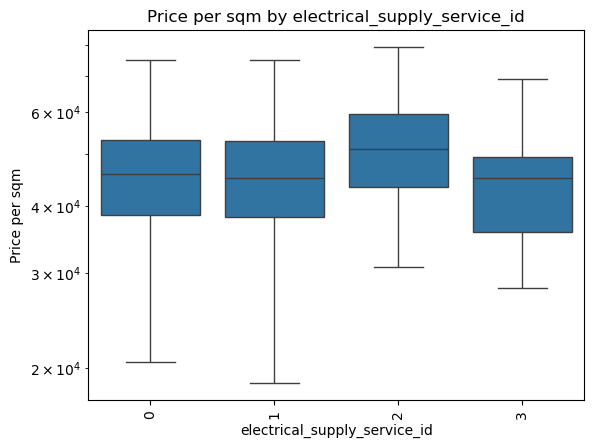

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


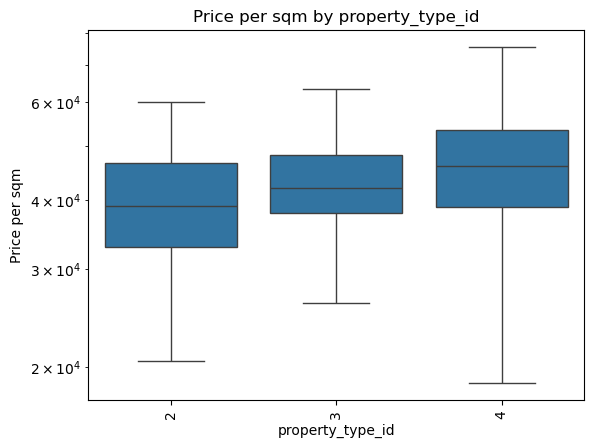

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


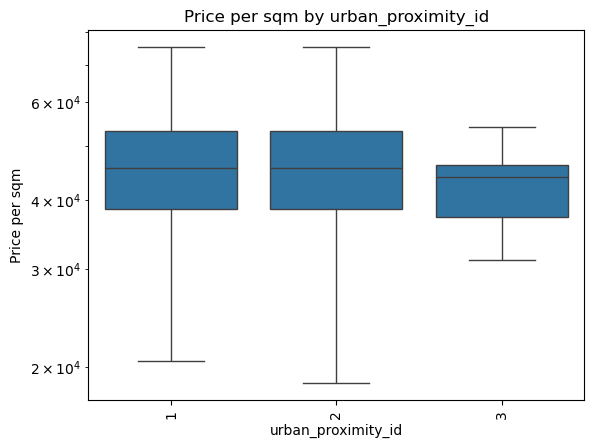

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


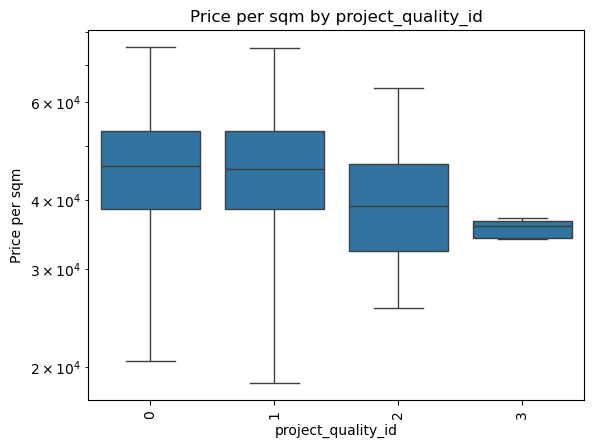

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


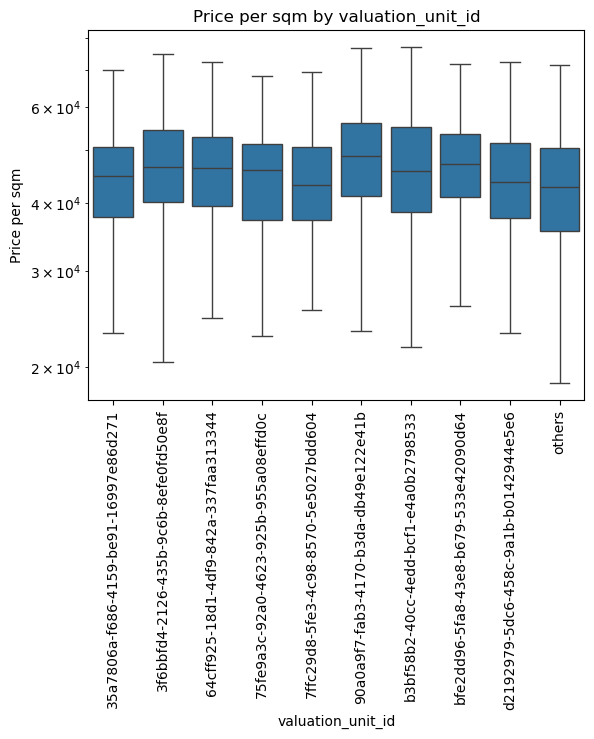

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


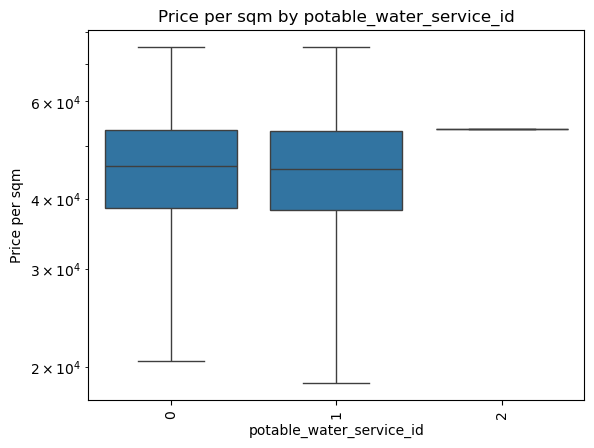

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


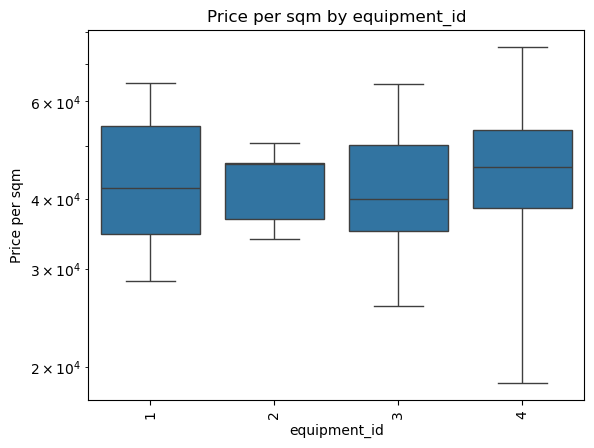

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


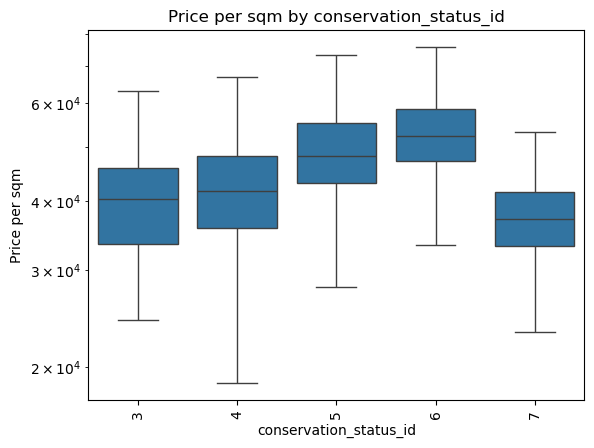

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


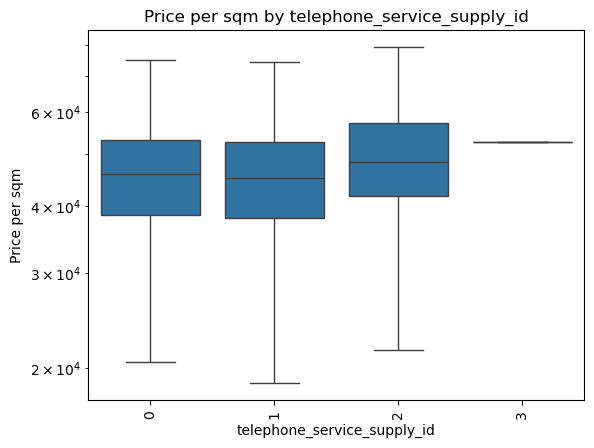

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


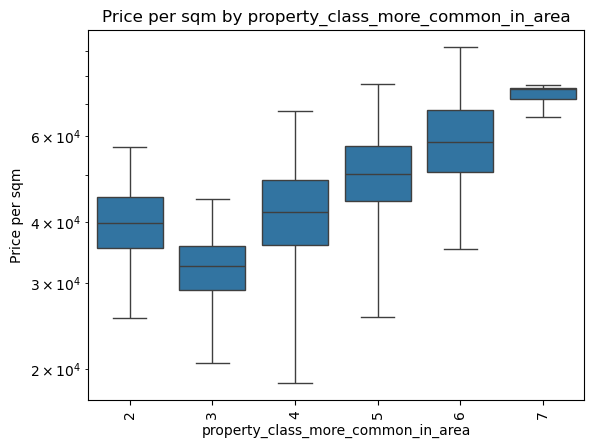

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


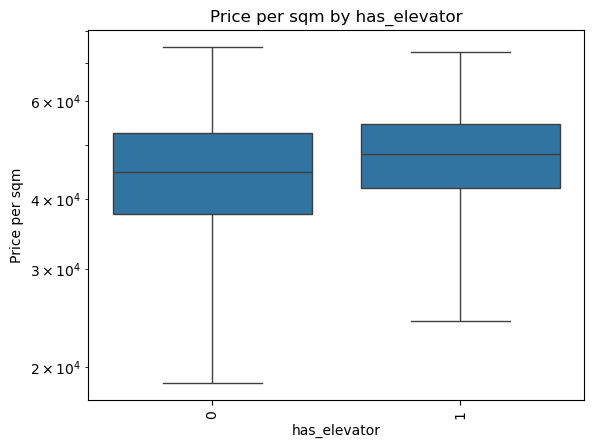

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


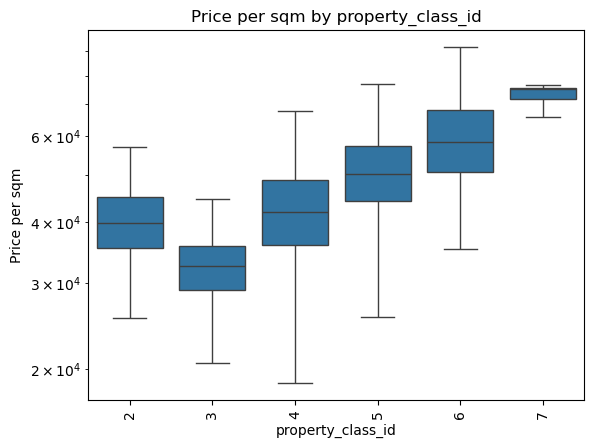

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


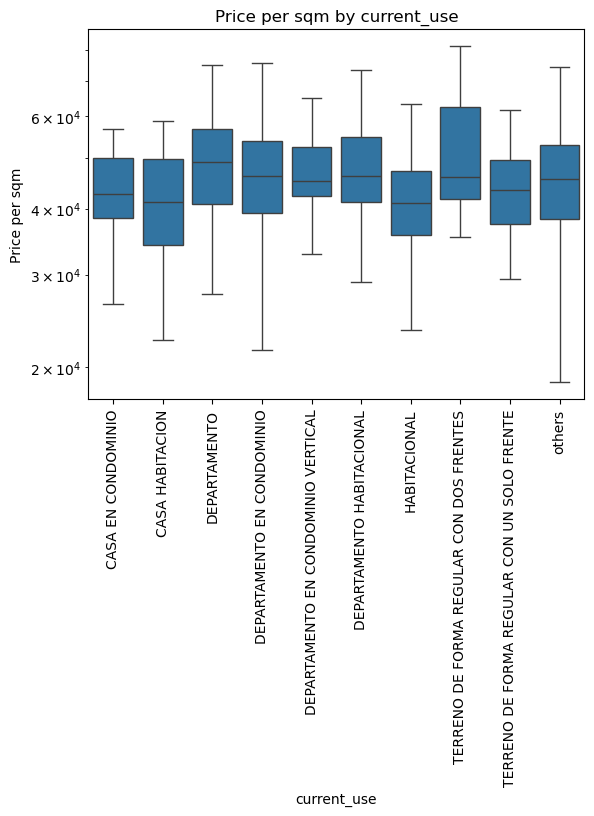

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


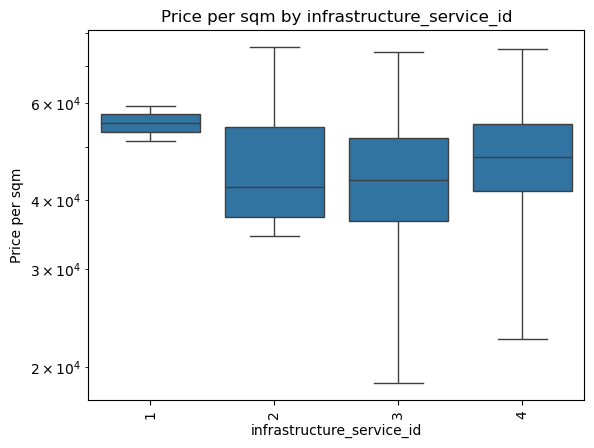

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


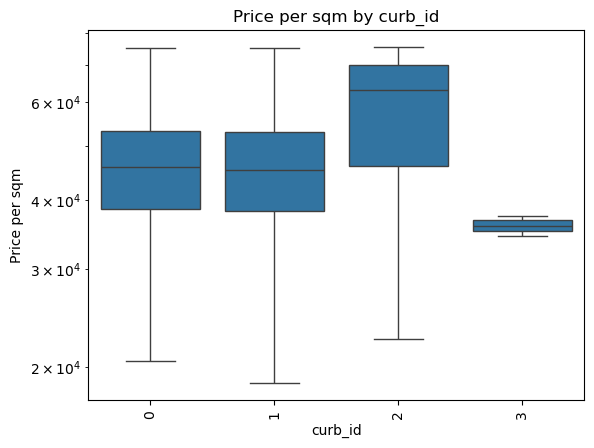

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


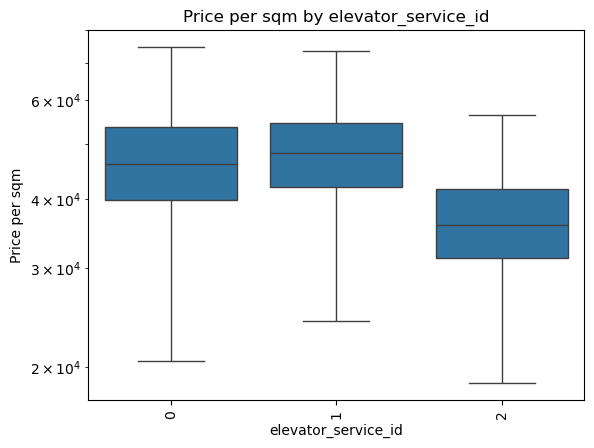

In [ ]:
# plot controlling by time and space
columns_categorical = list(set(
    gdf_properties.select_dtypes(include='string').columns.tolist()
    + gdf_properties.select_dtypes(include='category').columns.tolist() 
    + gdf_properties.select_dtypes(include='object').columns.tolist()
    + gdf_properties.filter(like='_id').columns.tolist()
    + ['has_elevator']
    ))

# drop controller_id, valuation_professional_id, access_routes, constructor, observation_id, property_id, hex_id,
# grantor_id, purpose_of_appraisal
cols_not_to_plot = [
    'controller_id', 'valuation_professional_id', 'access_routes', 'constructor',
    'observation_id', 'property_id', 'hex_id', 'grantor_id', 'purpose_of_appraisal',
    'municipality_id', 'state_id', 'cluster', 'property_type', 'neighborhood'
]

# remove
columns_categorical = [col for col in columns_categorical if col not in cols_not_to_plot]

for col in columns_categorical:
    plot_box_plot(gdf_properties_spatiotemporal_control, col, max_values=10)
    

## Continuous

In [ ]:
# continuous variables
def plot_scatter_lowess(df, x, y='ppsm', lowess=True, log_x=False, log_y=False, **kwargs,):
    """
    Create a scatter plot of two columns in a DataFrame with a LOWESS curve.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        x (str): The column to plot on the x-axis.
        y (str): The column to plot on the y-axis.
        lowess (bool): Whether to plot a LOWESS curve.
        log_x (bool): Whether to use a log scale on the x-axis.
        log_y (bool): Whether to use a log scale on the y-axis.
        **kwargs: Additional keyword arguments to pass to the scatter plot.

    Returns:
        None: The function does not return a value. It displays the scatter plot.
    """
    # plot
    sns.scatterplot(x=x, y=y, data=df, **kwargs)

    # title
    plt.title(f'{x} vs. {y}')

    # labels
    plt.xlabel(x)
    plt.ylabel(y)

    # log scale
    if log_x:
        plt.xscale('log')
    if log_y:
        plt.yscale('log')

    # y ticks in thousands and money
    plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

    # lowess
    if lowess:
        sns.regplot(x=x, y=y, data=df, scatter=False, lowess=True, line_kws={'color': 'red'})

    # show
    plt.show()


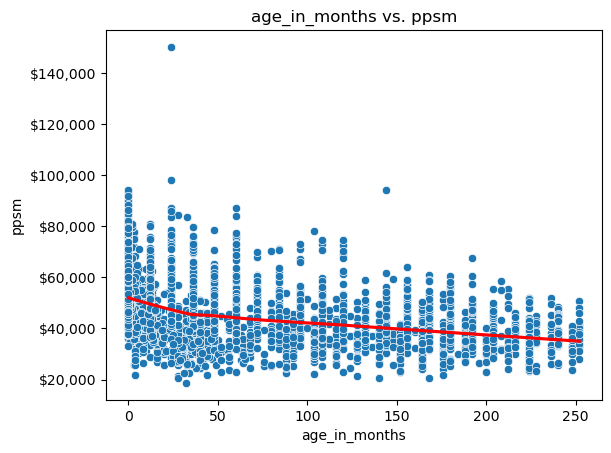

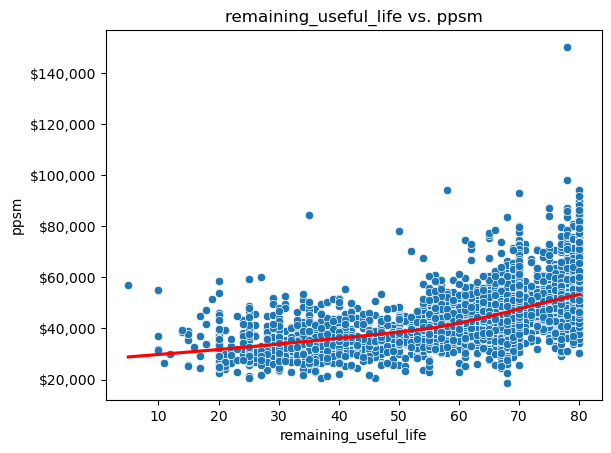

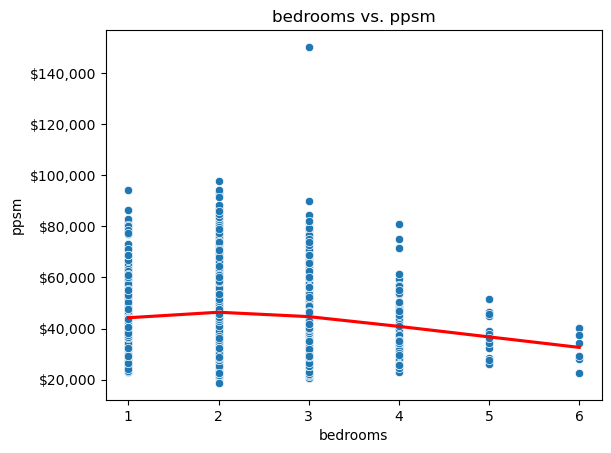

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


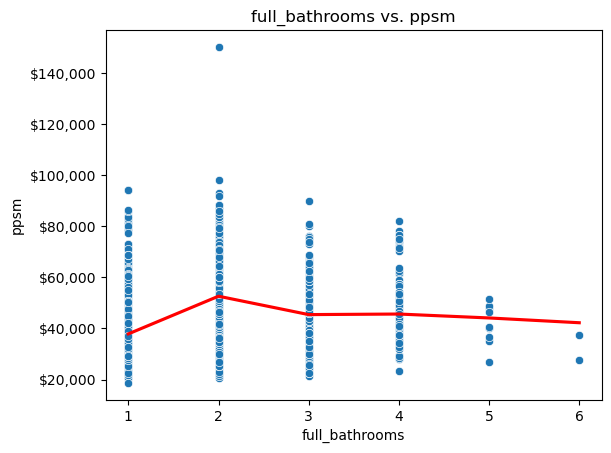

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


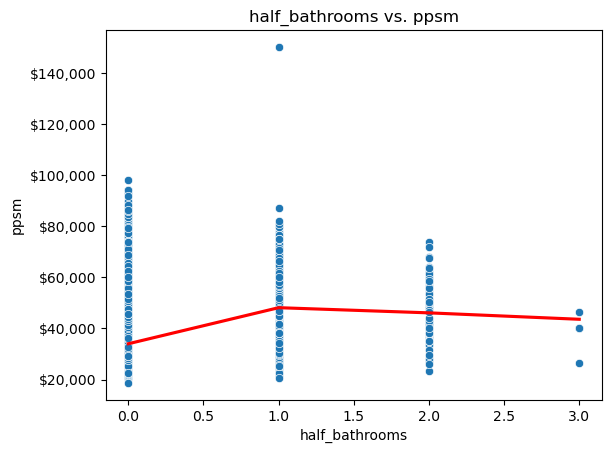

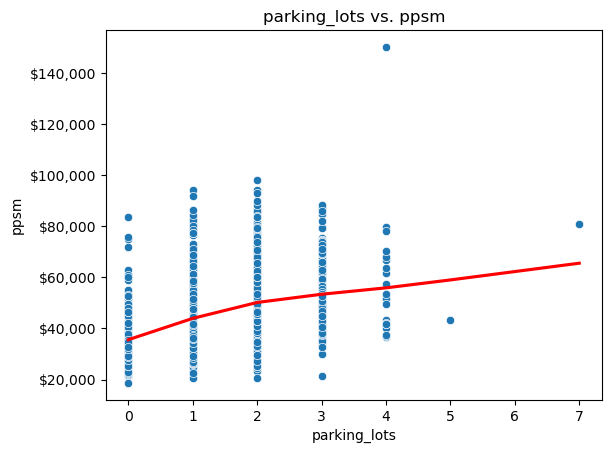

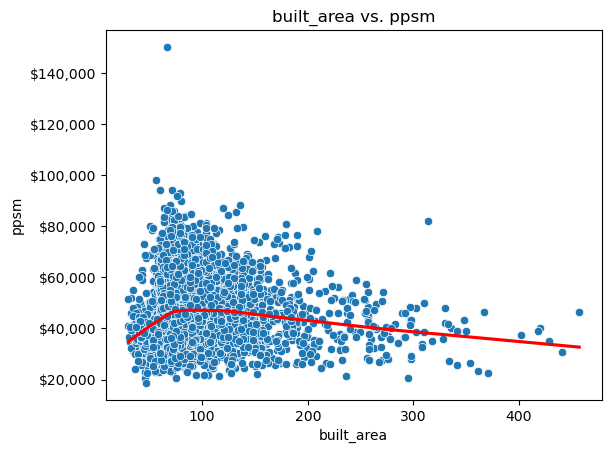

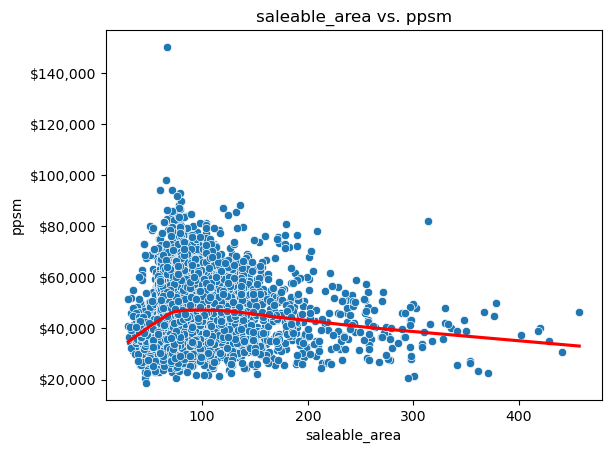

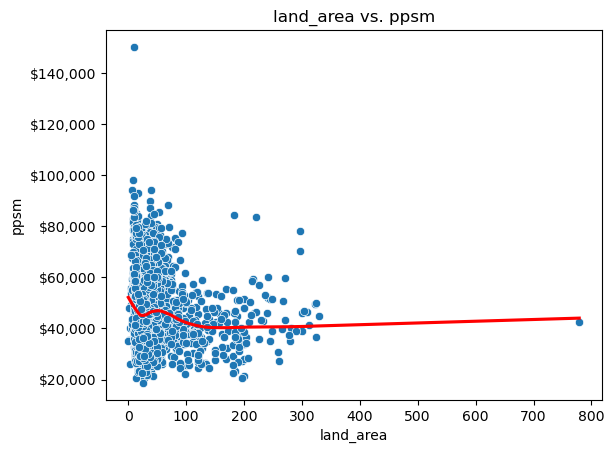

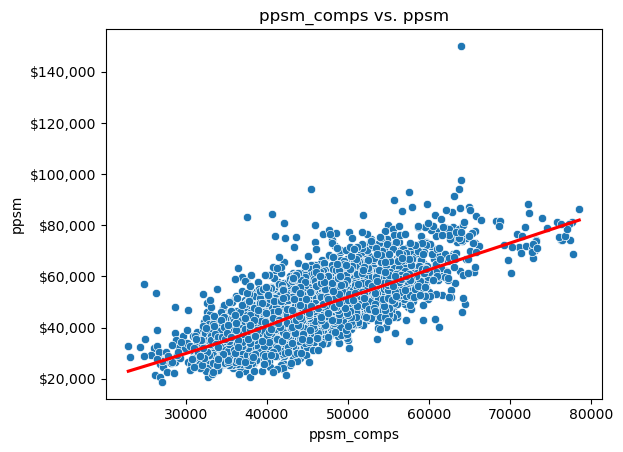

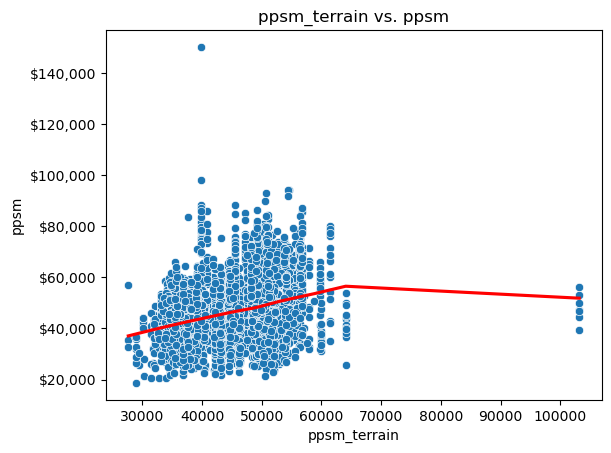

In [ ]:
# scatter plot 
columns_continuous = [
    'age_in_months', 'remaining_useful_life', 'bedrooms',
    'full_bathrooms', 'half_bathrooms', 'parking_lots',
    'built_area', 'saleable_area', 'land_area',
    'ppsm_comps', 'ppsm_terrain'
]
# control by time & space
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_spatiotemporal_control, col)

# control by time & space and property_type
# plot_scatter_lowess(gdf_properties_spatiotemporal_control.query("property_type.eq('house')"), 'superficie_terreno')
# plot_scatter_lowess(gdf_properties_spatiotemporal_control.query("property_type.eq('apartment')"), 'superficie_terreno')


/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


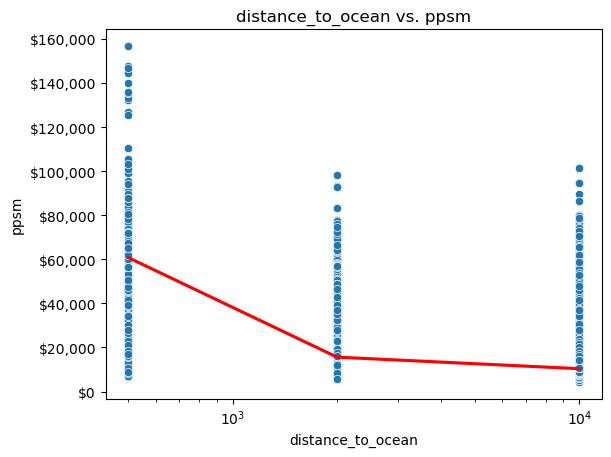

In [ ]:
# control by time & space & in beach
plot_scatter_lowess(
    (
        gdf_properties_time_control
        .query("ocean_label.eq('mar_caribe')")
    ),
    'distance_to_ocean',
    log_x=True
    )

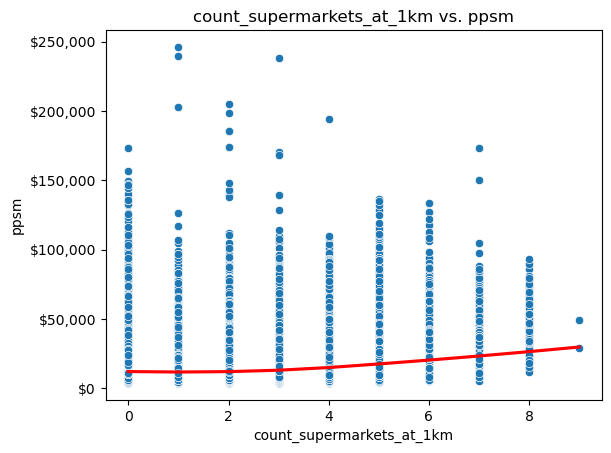

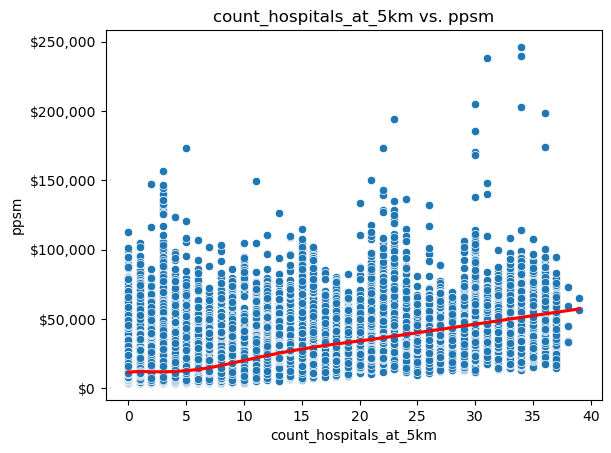

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


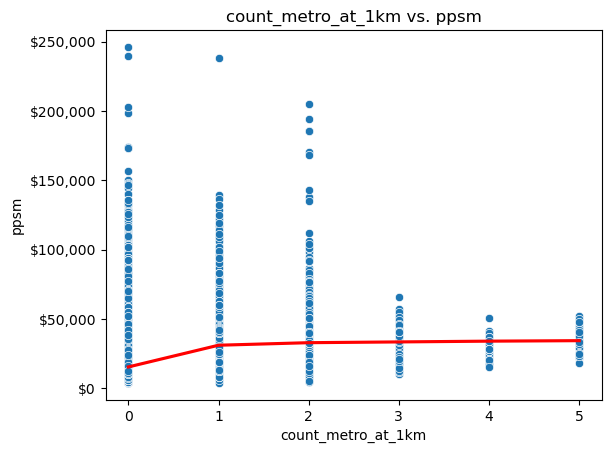

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


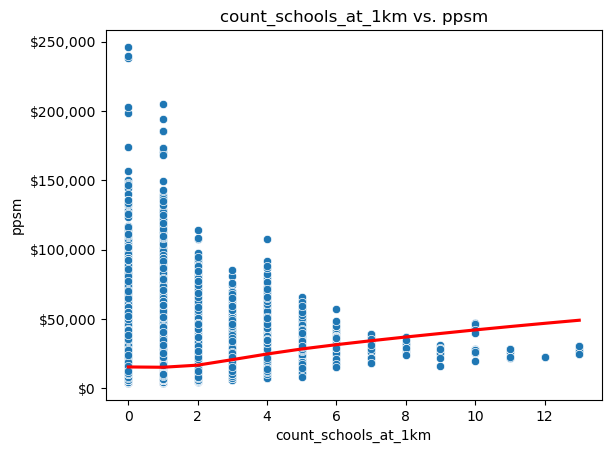

/Users/ravj/opt/anaconda3/envs/mds-research-stay/lib/python3.10/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


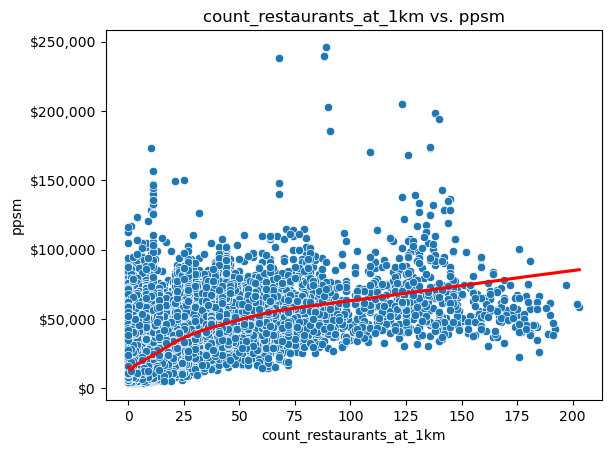

In [ ]:
# counts
columns_continuous = gdf_properties_time_control.filter(like='count').columns.tolist()

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_time_control, col)

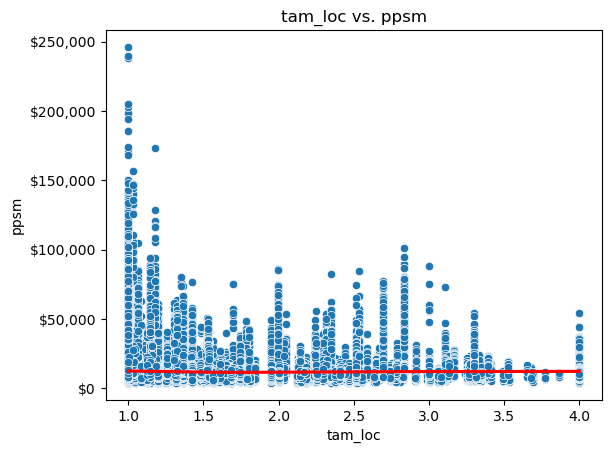

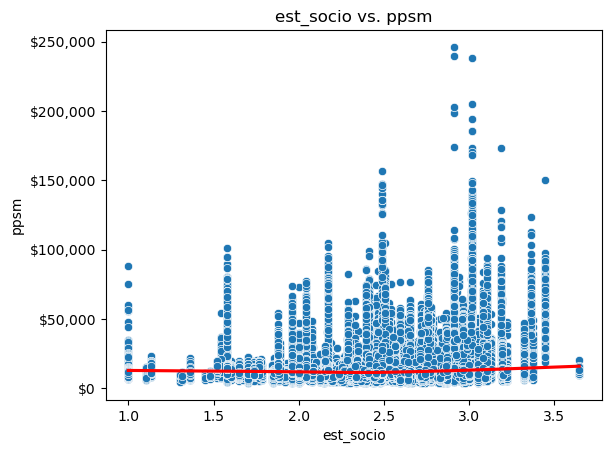

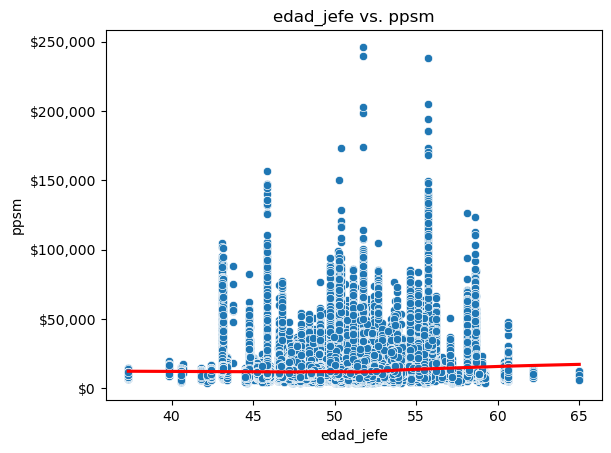

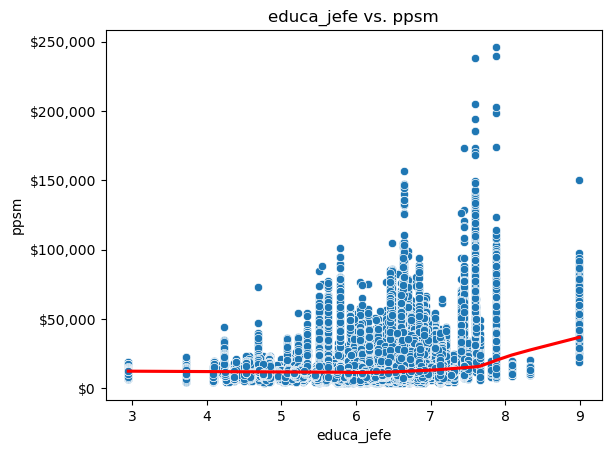

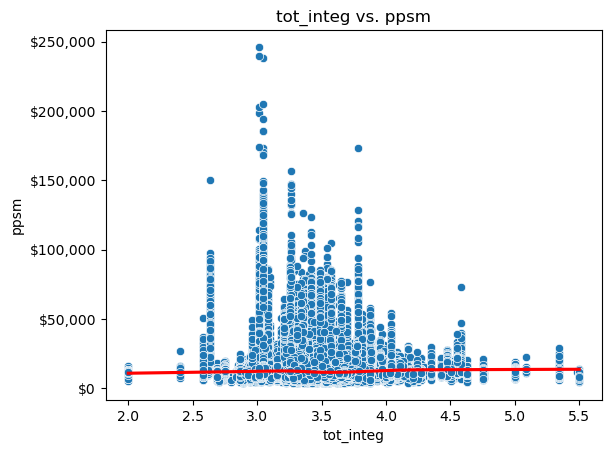

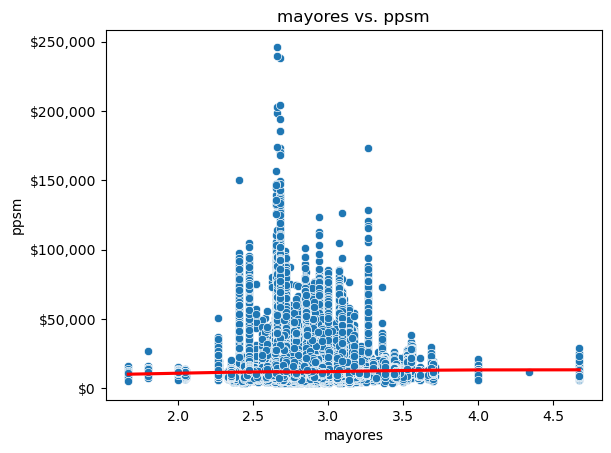

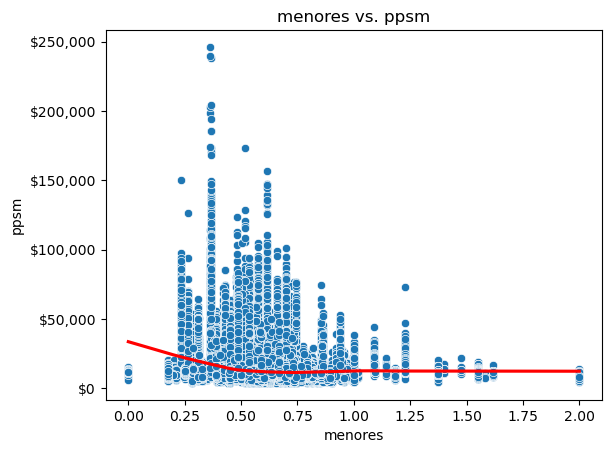

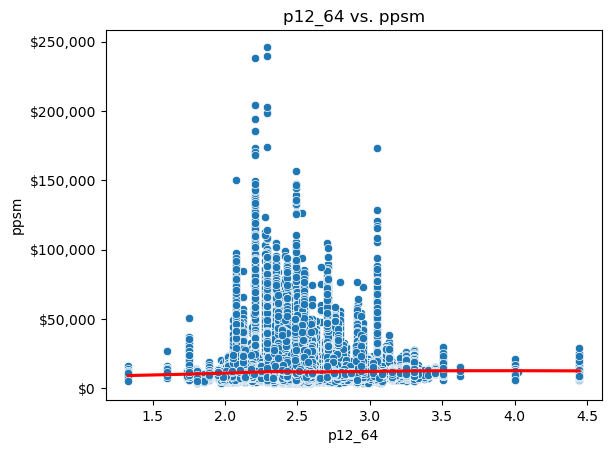

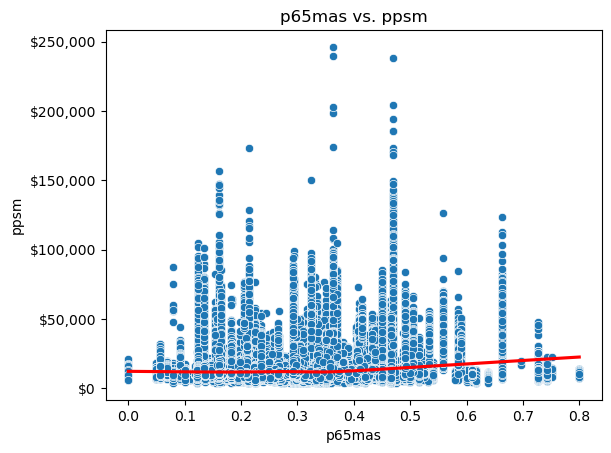

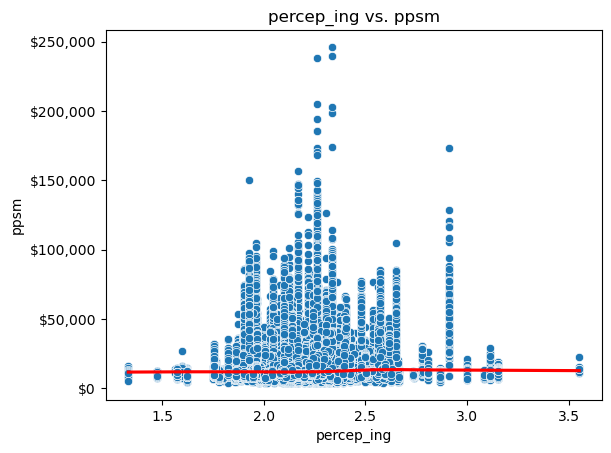

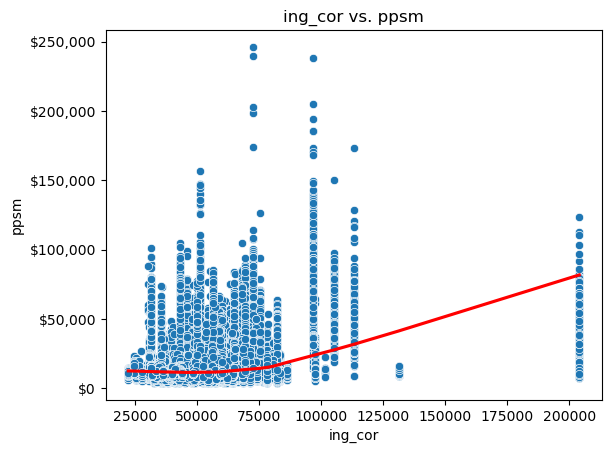

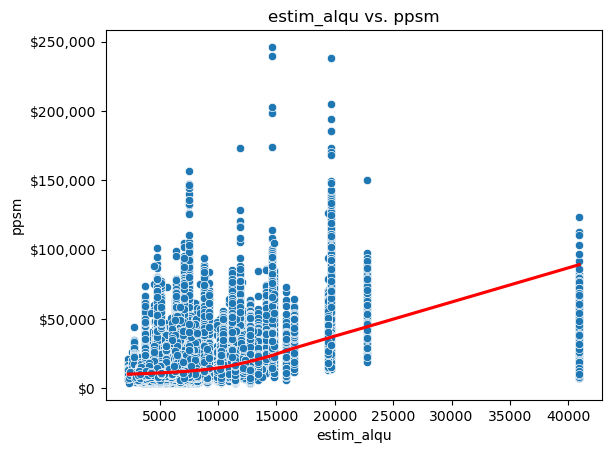

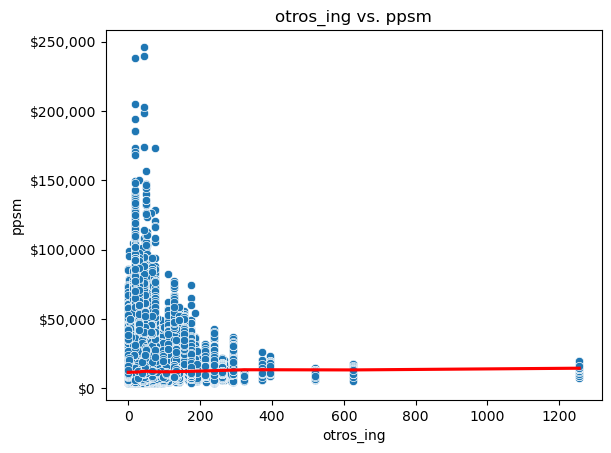

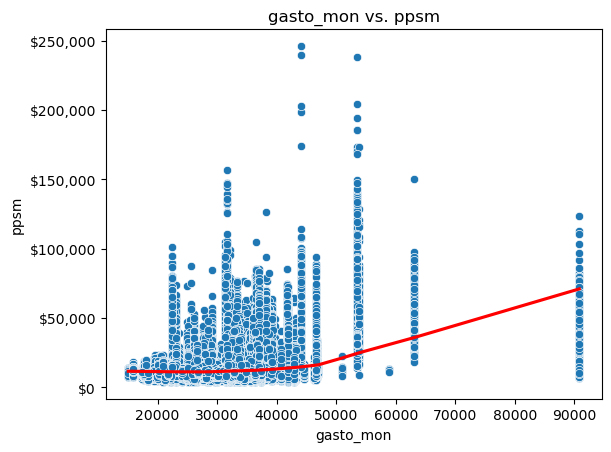

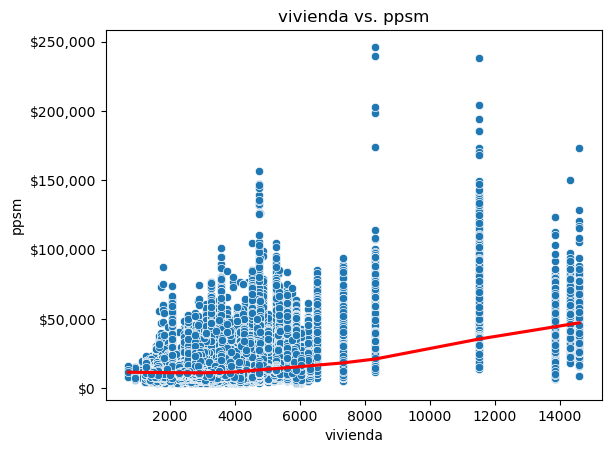

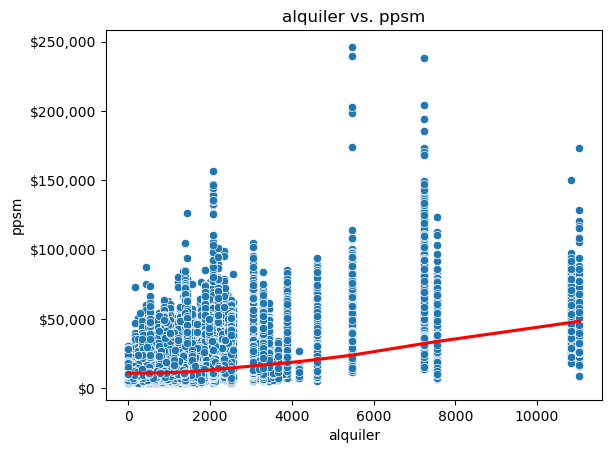

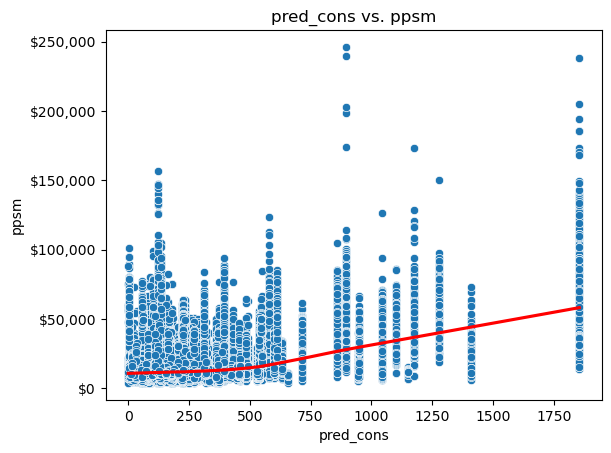

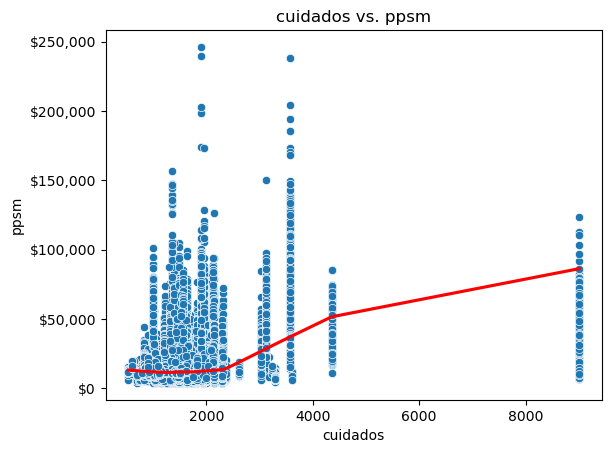

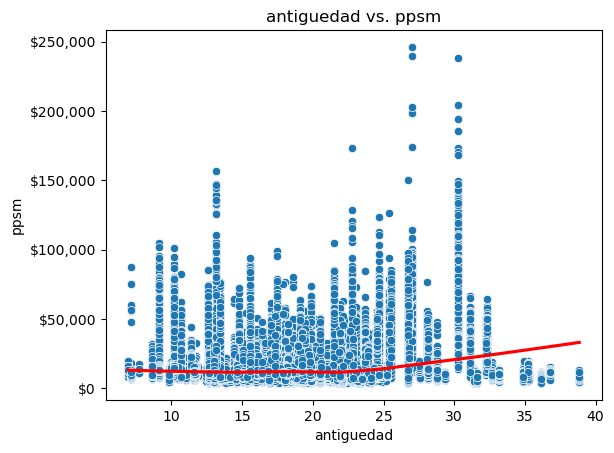

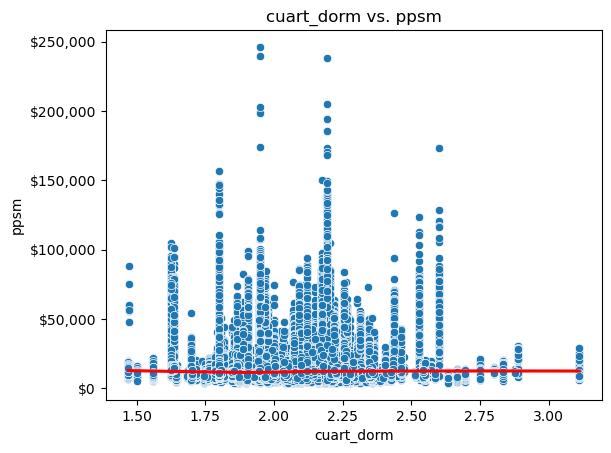

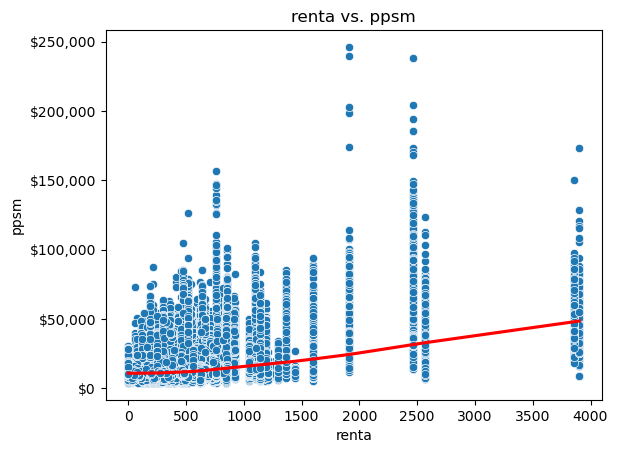

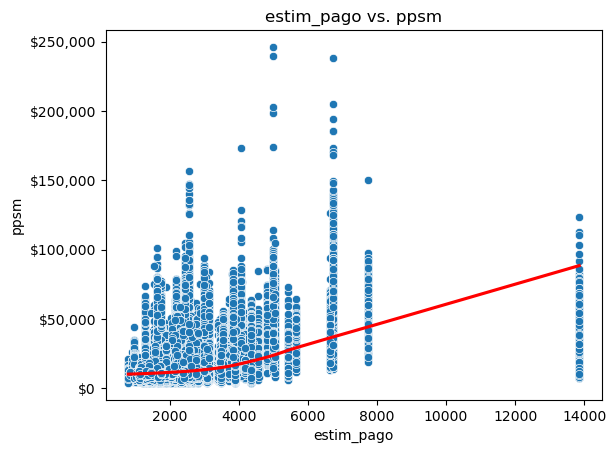

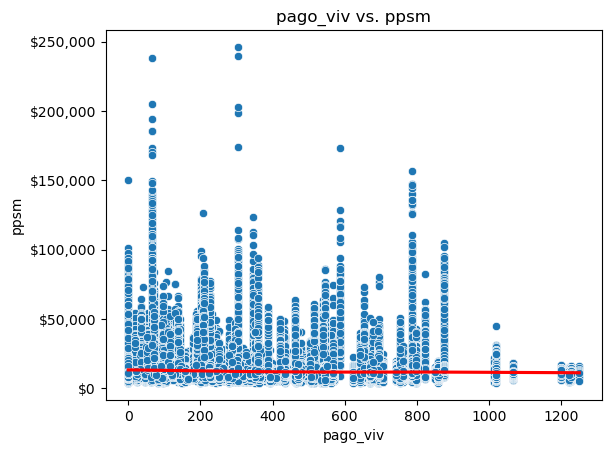

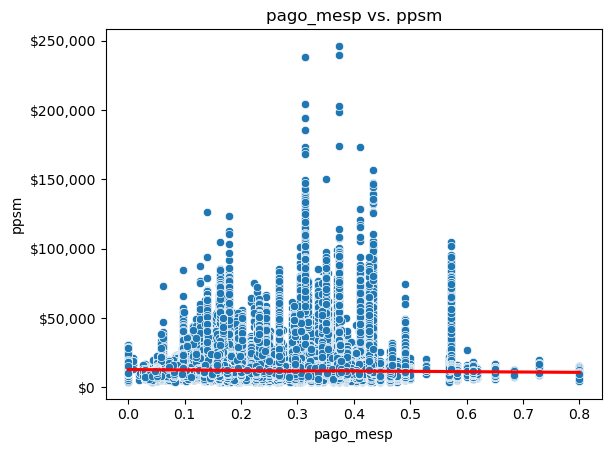

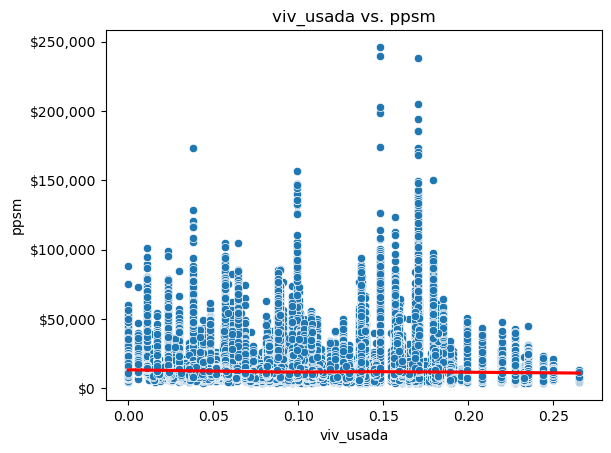

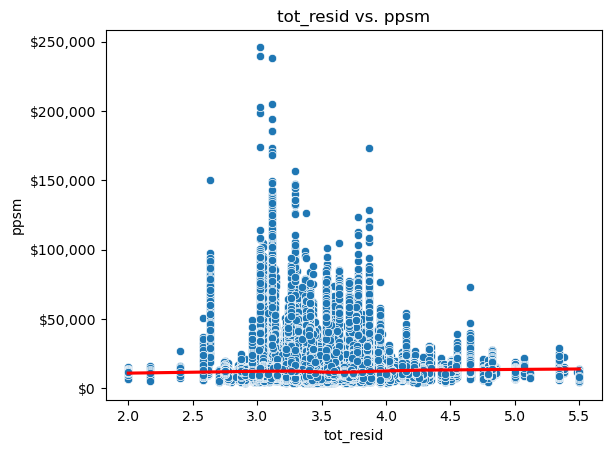

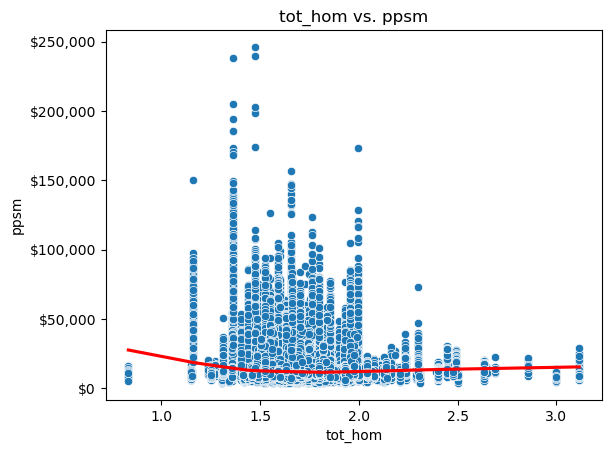

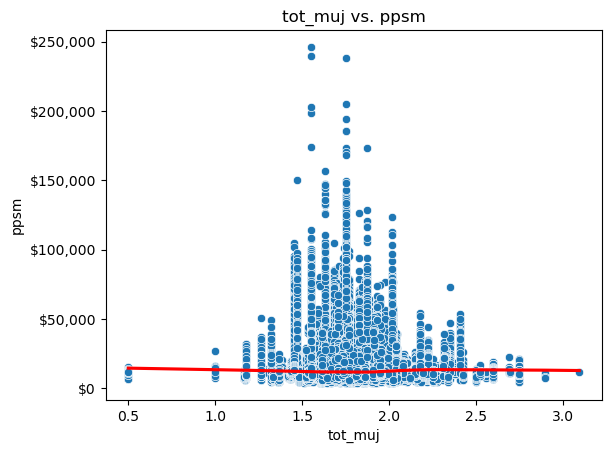

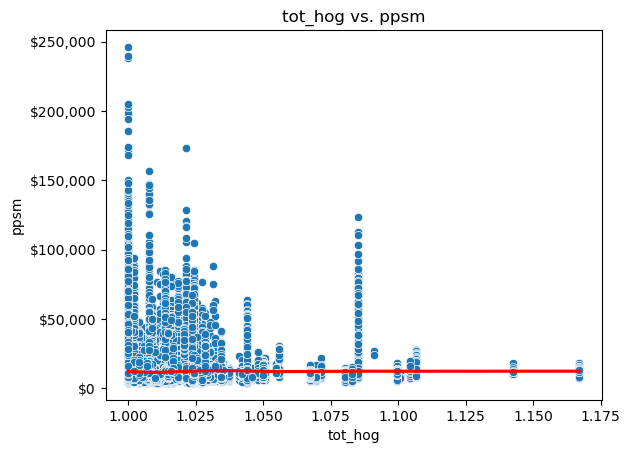

In [ ]:
# scatter plot (enigh)
columns_continuous = [
    'tam_loc', 'est_socio', 'edad_jefe', 'educa_jefe', 'tot_integ',
    'mayores', 'menores', 'p12_64', 'p65mas', 'percep_ing', 'ing_cor',
    'estim_alqu', 'otros_ing', 'gasto_mon', 'vivienda', 'alquiler', 'pred_cons',
    'cuidados', 'antiguedad', 'cuart_dorm', 'renta', 'estim_pago', 'pago_viv',
    'pago_mesp', 'viv_usada', 'tot_resid', 'tot_hom', 'tot_muj', 'tot_hog', 
]

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_time_control, col)


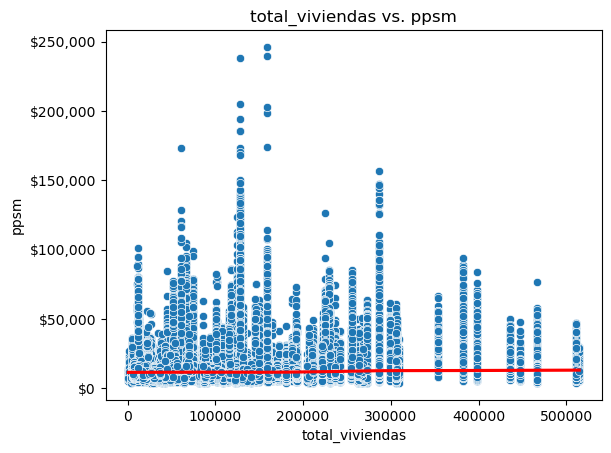

In [ ]:
# scatter plot (enigh)
plot_scatter_lowess(gdf_properties_time_control, 'total_viviendas')

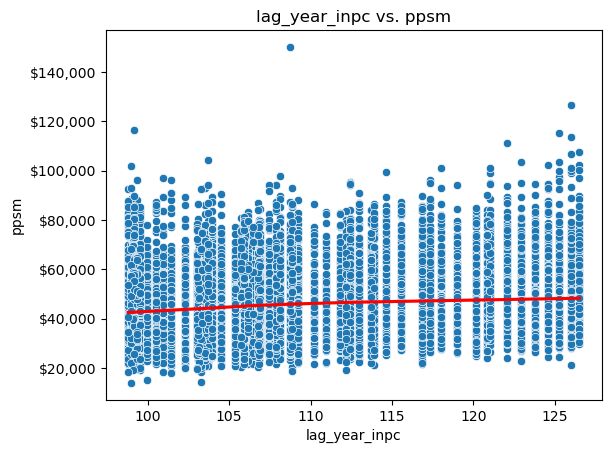

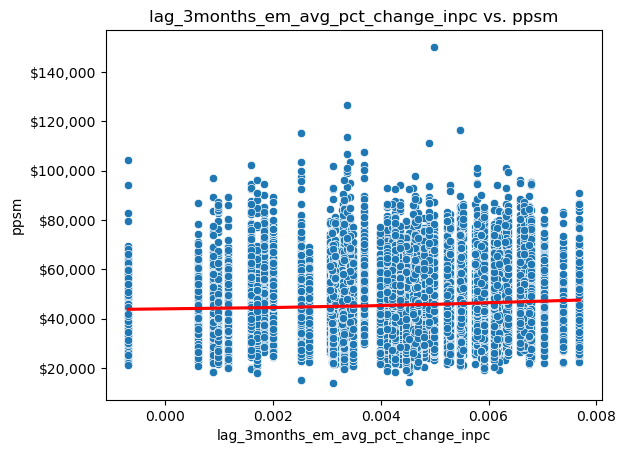

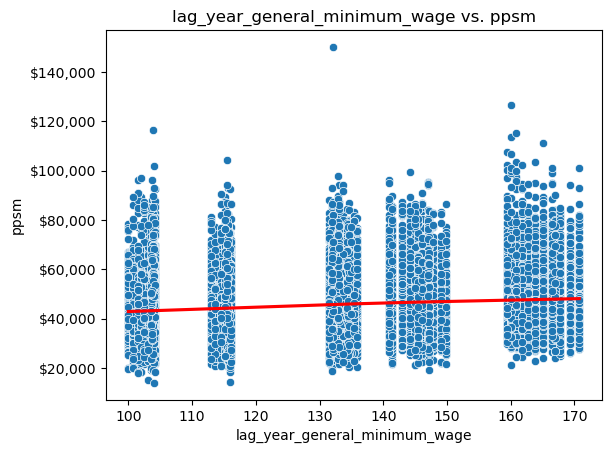

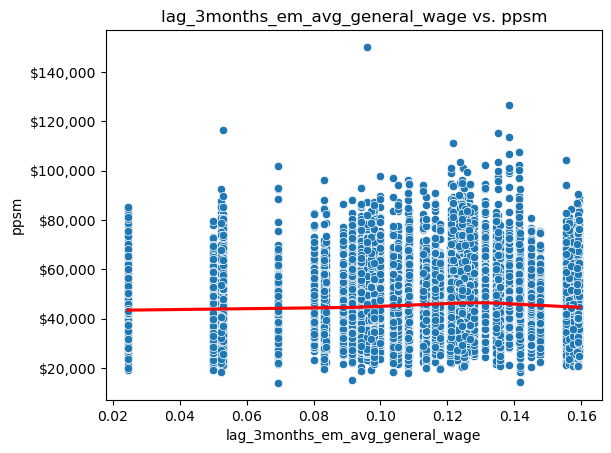

In [ ]:
# indexes
columns_continuous = [
    'lag_year_inpc', 'lag_3months_em_avg_pct_change_inpc', 'lag_year_general_minimum_wage',
    'lag_3months_em_avg_general_wage'
]

# plot
for col in columns_continuous:
    plot_scatter_lowess(gdf_properties_spatial_control, col)


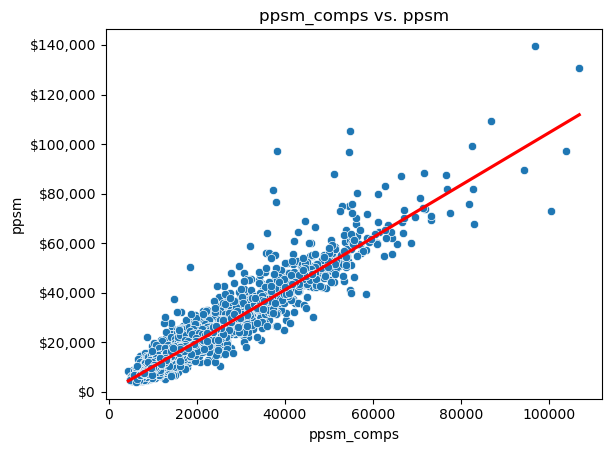

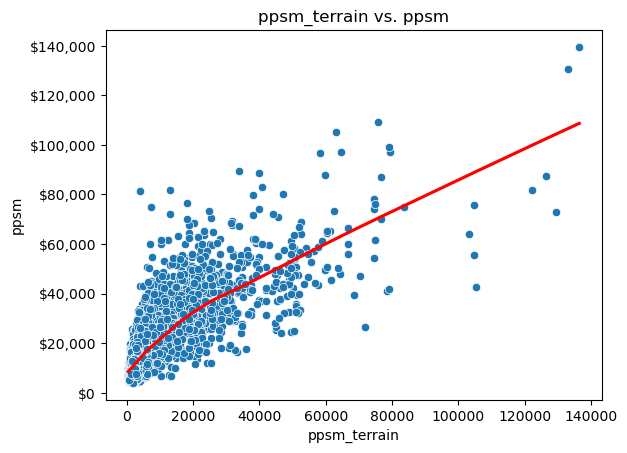

In [ ]:
# competitors & mean terrain price
plot_scatter_lowess(gdf_properties.sample(10_000, random_state=42), 'ppsm_comps')
plot_scatter_lowess(gdf_properties.sample(10_000, random_state=42), 'ppsm_terrain')

## Spatial Correlation (WIP)

In [ ]:
# calculate
table_spatial_corr = (
    gdf_properties
    .query("state_id.eq('09') & municipality_id.eq('014') & valuation_date.dt.year.eq(2021)")
    .groupby(['hex_id'], as_index=False)
    .agg(
        ppsm=('ppsm', lambda x: x.shape[0] / np.sum(1 / x)),
    )
    .assign(
        geometry=lambda x: x['hex_id'].apply(lambda y: Polygon(h3.h3_to_geo_boundary(y, geo_json=True)))
    )
    .pipe(gpd.GeoDataFrame, crs='EPSG:4326', geometry='geometry')
)

# polygon
table_spatial_corr.explore('ppsm', tiles='cartodbpositron')

## Time Correlation

/var/folders/42/2lkg1sf91wv7mjxw6klfcqtc0000gn/T/ipykernel_7424/2056577144.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))


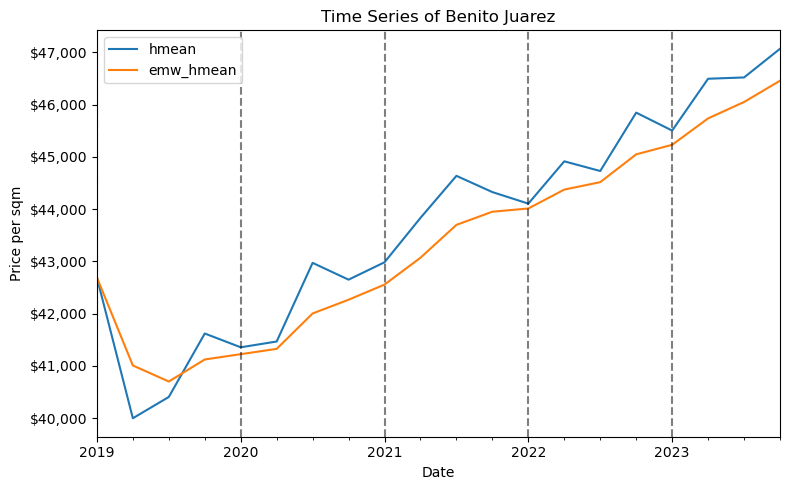

In [ ]:
# hmean by quarter
ts_hmean = (
    gdf_properties
    .query("state_id.eq('09') & municipality_id.eq('014')")
    .assign(
        quarter=lambda x: x['valuation_date'].dt.to_period('Q')
    )
    .groupby('quarter')
    .apply(lambda x: (x.shape[0] / np.sum(1 / x['ppsm'])))
    .to_frame('hmean')
    .assign(
        # get exponential moving average
        emw_hmean=lambda x: x['hmean'].ewm(span=4).mean()
    )
)

# plot
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

# plot hmean
ts_hmean['hmean'].plot(ax=ax, color='C0', label='hmean')
# plot emw
ts_hmean['emw_hmean'].plot(ax=ax, color='C1', label='emw_hmean')

# add line each beginning of year
for year in range(gdf_properties['valuation_date'].dt.year.min(), gdf_properties['valuation_date'].dt.year.max() + 1):
    plt.axvline(x=f'{year}-01', color='k', linestyle='--', alpha=0.5)

# title
plt.title("Time Series of Benito Juarez")
# labels
plt.xlabel("Date")
plt.ylabel("Price per sqm")

# show legend
plt.legend()

# y ticks in thousands and money
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('${x:,.0f}'))

# tight
plt.tight_layout()

# show
plt.show()

---
# Sandbox

In [ ]:
print(gdf_properties.columns.tolist())

In [ ]:
cont_cols = gdf_properties.select_dtypes(include='number').columns.tolist()
print(cont_cols)

In [ ]:
gdf_properties['neighborhood'].value_counts()

neighborhood
CENTRO                                                            5326
LOS HEROES TIZAYUCA                                               4572
BRISAS DEL CAMPESTRE                                              4201
REGION 065                                                        3614
LOS HEROES                                                        3487
                                                                  ... 
FRACCIONAMIENTO VILLA RESIDENCIAL DEL PRADO CONDOMINIO NOGAL 7       1
COLONIA TEZOYUCA CONJ URB RES LOS SAUCES COND 3                      1
LAS VICTORIAS COND MONTE CARLO CONDOMINIO SIMPLE NÚMERO 1            1
CIUDAD MARQUES COND E U C BRISEA                                     1
CLUB DEPORTIVO SECCION LOMAS FRACCION UNO                            1
Name: count, Length: 190964, dtype: Int64

In [ ]:
gdf_properties_time_control['ocean_label'].value_counts()